In [1]:
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from tqdm import tqdm
import numpy as np 
import os

In [2]:
smiles_dataset = "C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/raw/smiles.csv"
smiles_df = pd.read_csv(smiles_dataset)
# print(smiles_df.head()) 
# smiles_df.shape

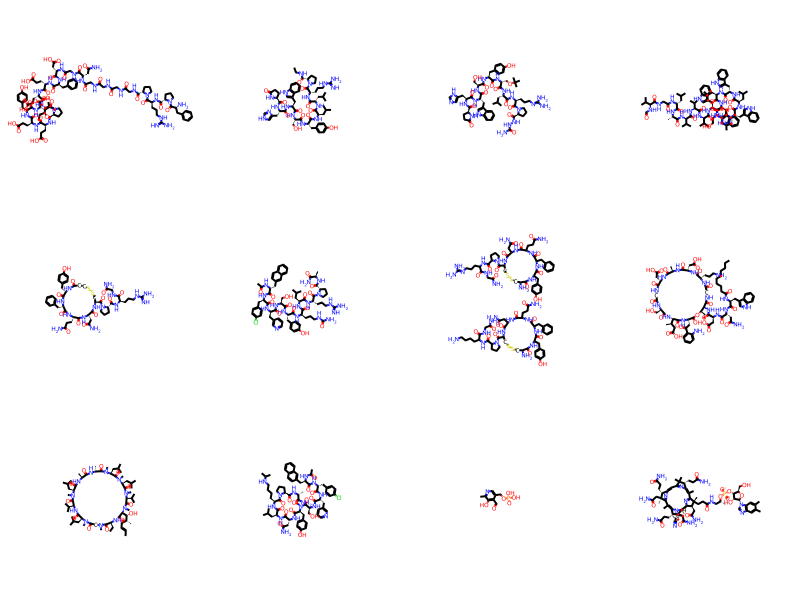

In [3]:
smiles_df['SMILES'] = smiles_df['SMILES'].astype(str).replace('nan', '')
sample_smiles = smiles_df["SMILES"][0:12].values
sample_mols = [Chem.MolFromSmiles(smiles)for \
              smiles in sample_smiles]
grid = Draw.MolsToGridImage(sample_mols,
                           molsPerRow = 4,
                           subImgSize = (200,200))
grid

In [109]:
import pandas as pd

# Assuming smiles_df is already loaded with the dataset
# smiles_df = pd.read_csv('path_to_your_drugbank_dataset.csv')

# List of prohibited drug categories
prohibited_categories = [
    "Anabolic Agents", "Anabolic Androgenic Steroids", "Peptide Hormones", "Erythroprotein", "Mimetics",
    "Erythropoietins", "Hypoxia-inducible factor (HIF) activating agents", "GATA inhibitors", "Transforming growth factor beta (TGF-ß)", 
    "Testosterone-stimulating peptides", "Corticotrophins", "Growth hormone (GH)", "growth hormone-releasing hormone (GHRH)", 
    "growth hormone secretagogues (GHS)", "GH-releasing peptides", "Fibroblast growth factors (FGFs)", 
    "Hepatocyte growth factor (HGF)", "Insulin-like growth factor 1 (IGF-1, mecasermin) and its analogues", 
    "Mechano growth factors (MGFs)", "Platelet-derived growth factor (PDGF)", "Thymosin-ß4 and its derivatives e.g. TB-500", 
    "Vascular endothelial growth factor (VEGF)", "BETA - 2 Agonists", "Optical Isomers", "Aromatase Inhibitors", 
    "Anti-Estrogenic Substances", "Anti-Estrogenic and Selective Estrogen Receptor Modulators (SERMS)", 
    "Agents Preventing Activin Receptor IIB Activation", "Activin A-neutralizing antibodies", 
    "Activin receptor IIB competitors", "Anti-activin receptor IIB antibodies", "Myostatin inhibitors", 
    "Myostatin- or precursor-neutralizing antibodies", "Metabolic Modulators", "Activators of the AMP-activated protein kinase (AMPK)", 
    "peroxisome proliferator-activated receptor delta (PPARδ) agonists", "Reverbɑ agonists", "Insulins and insulin-mimetics", 
    "Meldonium", "Trimetazidine", "Diuretics and Masking Agents", "Vaptans", "Plasma expanders by intravenous administration", 
    "Desmopressin", "Stimulants", "Narcotics", "Cannabinoids", "Glucocorticoids", "Beta - Blockers"
]

# Convert prohibited categories to lower case for easier matching
prohibited_categories_lower = [category.lower() for category in prohibited_categories]

# Function to find exact matching categories
def find_matching_categories(drug_categories):
    if isinstance(drug_categories, str):
        matches = [category for category in prohibited_categories_lower if category in drug_categories.lower()]
        return matches
    return []

# Iterate through the DataFrame and check for matches
for index, row in smiles_df.iterrows():
    drug_categories = row['Drug Categories']
    matches = find_matching_categories(drug_categories)
    if matches:
        print(f"DrugBank ID: {row['DrugBank ID']}, Name: {row['Name']}, Matches: {', '.join(matches)}")


DrugBank ID: DB00014, Name: Goserelin, Matches: peptide hormones
DrugBank ID: DB00035, Name: Desmopressin, Matches: peptide hormones
DrugBank ID: DB00050, Name: Cetrorelix, Matches: peptide hormones
DrugBank ID: DB00067, Name: Vasopressin, Matches: peptide hormones
DrugBank ID: DB00182, Name: Amphetamine, Matches: mimetics, stimulants
DrugBank ID: DB00184, Name: Nicotine, Matches: stimulants
DrugBank ID: DB00185, Name: Cevimeline, Matches: mimetics
DrugBank ID: DB00191, Name: Phentermine, Matches: mimetics
DrugBank ID: DB00193, Name: Tramadol, Matches: narcotics
DrugBank ID: DB00201, Name: Caffeine, Matches: stimulants
DrugBank ID: DB00211, Name: Midodrine, Matches: mimetics, stimulants
DrugBank ID: DB00235, Name: Milrinone, Matches: stimulants
DrugBank ID: DB00253, Name: Medrysone, Matches: glucocorticoids
DrugBank ID: DB00288, Name: Amcinonide, Matches: glucocorticoids
DrugBank ID: DB00289, Name: Atomoxetine, Matches: stimulants
DrugBank ID: DB00295, Name: Morphine, Matches: narcotic

In [116]:
import pandas as pd

# Assuming smiles_df is already loaded with the dataset
# smiles_df = pd.read_csv('path_to_your_drugbank_dataset.csv')

# Filter the DataFrame to get only the rows where the Doping column is 1.0
doping_drugs = smiles_df[smiles_df['Doping'] == 1.0]
doping_list = doping_drugs[['DrugBank ID', 'Name']]

with open('C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/doping_drugs_list.txt', 'w',encoding='utf-8') as file:
    for index, row in doping_list.iterrows():
        file.write(f"DrugBank ID: {row['DrugBank ID']}, Name: {row['Name']}\n")


In [121]:
import pandas as pd

# Assuming smiles_df is already loaded with the dataset
# smiles_df = pd.read_csv('path_to_your_drugbank_dataset.csv')

# Function to check if 'approved' or 'nutraceutical' are not in the Drug Groups
def is_not_approved_or_nutraceutical(drug_groups):
    if isinstance(drug_groups, str):
        groups = [group.strip().lower() for group in drug_groups.split(';')]
        return 'approved' not in groups and 'nutraceutical' not in groups
    return False

# Filter the DataFrame based on the condition
non_approved_drugs = smiles_df[smiles_df['Drug Groups'].apply(is_not_approved_or_nutraceutical)]

# Select the columns to include in the text file
non_approved_list = non_approved_drugs[['DrugBank ID', 'Name', 'Drug Groups']]

# Save the list to a text file with utf-8 encoding
with open('C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/non_approved_drugs_list.txt', 'w', encoding='utf-8') as file:
    for index, row in non_approved_list.iterrows():
        file.write(f"DrugBank ID: {row['DrugBank ID']}, Name: {row['Name']}, Group: {row['Drug Groups']}\n")


In [5]:
import pandas as pd

# Assuming smiles_df is already loaded with the dataset
# smiles_df = pd.read_csv('path_to_your_drugbank_dataset.csv')

# Function to check if 'approved' or 'nutraceutical' are not in the Drug Groups
def default_doping(drug_groups):
    if isinstance(drug_groups, str):
        groups = [group.strip().lower() for group in drug_groups.split(';')]
        return any(group in ['illicit', 'withdrawn', 'veterinary_use'] for group in groups)
    return False

# Filter the DataFrame based on the condition
non_approved_drugs = smiles_df[smiles_df['Drug Groups'].apply(default_doping)]

# Select the columns to include in the text file
non_approved_list = non_approved_drugs[['DrugBank ID', 'Name', 'Drug Groups']]

# Save the list to a text file with utf-8 encoding
with open('C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/default_doped_drugs_list.txt', 'w', encoding='utf-8') as file:
    for index, row in non_approved_list.iterrows():
        file.write(f"DrugBank ID: {row['DrugBank ID']}, Name: {row['Name']}, Group: {row['Drug Groups']}\n")


In [11]:
# import os.path as osp

# import torch
# from torch_geometric.data import Dataset, Data, download_url

# smiles_df['SMILES'] = smiles_df['SMILES'].astype(str).replace('nan', '')
# class DopingDataset(Dataset):
#     def __init__(self, root, filename, test=False, transform=None, pre_transform=None, pre_filter=None):
#         self.test = test
#         self.filename = filename
#         super(DopingDataset, self).__init__(root, transform, pre_transform, pre_filter)

#     @property
#     def raw_file_names(self):
#         return self.filename
#         #return ['data/raw/wada_filtered.csv', 'some_file_2', ...]
    
#     @property
#     def processed_file_names(self):
#         self.data = pd.read_csv(self.raw_paths[0]).reset_index()

#         if self.test:
#             return [f'data_test_{i}.pt' for i in list(self.data.index)]
#         else:
#             return [f'data_{i}.pt' for i in list(self.data.index)]
#         #return ['data_1.pt', 'data_2.pt', ...]

#     def download(self):
#         pass
#         # Download to `self.raw_dir`.
#         #path = download_url(url, self.raw_dir)


#     def process(self):
#         self.data = pd.read_csv(self.raw_paths[0])
        
#         for index, mol in tqdm(smiles_df.iterrows(), total=self.data.shape[0]):
#             mol_obj = Chem.MolFromSmiles(mol["SMILES"])
#             # Extract unique atoms from each molecule
#         #TQDM = how far our process is
#         for index, mol in tqdm(smiles_df.iterrows(), total=self.data.shape[0]):
#             mol_obj = Chem.MolFromSmiles(mol["SMILES"])
#             # Get node features
#             node_feats = self._get_node_features(mol_obj)
#             # Get edge features
#             edge_feats = self._get_edge_features(mol_obj)
#             # Get adjacency info
#             # edge_index = self._get_adjacency_info(mol_obj)
#             # Get labels info
#             label = self._get_labels(mol["Doping"])

#             # Create data object
#             data = Data(x=node_feats, 
#                         # edge_index=edge_index,
#                         edge_attr=edge_feats,
#                         y=label,
#                         smiles=mol["SMILES"]
#                         ) 
#             if self.test:
#                 torch.save(data, 
#                     os.path.join(self.processed_dir, 
#                                  f'data_test_{index}.pt'))
#             else:
#                 torch.save(data, 
#                     os.path.join(self.processed_dir, 
#                                  f'data_{index}.pt'))

#     def _get_node_features(self, mol):
#         """ 
#         This will return a matrix / 2d array of the shape
#         [Number of Nodes, Node Feature size]
#         """
#         all_node_feats = []

#         for atom in mol.GetAtoms():
#             # Reconsider which features are relevant for my reseacrh
#             node_feats = []
#             # Feature 1: Atomic number        
#             node_feats.append(atom.GetAtomicNum())
#             # Append node features to matrix
#             all_node_feats.append(node_feats)

#         all_node_feats = np.asarray(all_node_feats)
#         return torch.tensor(all_node_feats, dtype=torch.float)

#     def _get_edge_features(self, mol):
#         """ 
#         This will return a matrix / 2d array of the shape
#         [Number of edges, Edge Feature size]
#         """
#         all_edge_feats = []

#         for bond in mol.GetBonds():
#             edge_feats = []
#             # Feature 1: Bond type 
#             edge_feats.append(bond.GetBondType())
#             # Append node features to matrix (twice, per direction)
#             all_edge_feats.append(edge_feats)
#             # all_edge_feats += [edge_feats, edge_feats]

#         all_edge_feats = np.asarray(all_edge_feats)
#         return torch.tensor(all_edge_feats, dtype=torch.float)

#     def _get_labels(self, label):
#         label = np.asarray([label])
#         return torch.tensor(label, dtype=torch.int64)

#     def len(self):
#         return len(self.processed_file_names)

#     def get(self, idx):
#         data = torch.load(osp.join(self.processed_dir, f'data_{idx}.pt'))
#         return data

In [84]:
import os.path as osp

import torch
from torch_geometric.data import Dataset, Data, download_url
from rdkit.Chem import rdmolops

smiles_df['SMILES'] = smiles_df['SMILES'].astype(str).replace('NoneType', '')
class DopingDataset(Dataset):
    def __init__(self, root, filename, atom_map, test=False, transform=None, pre_transform=None, pre_filter=None):
        self.test = test
        self.filename = filename
        self.atom_map = atom_map
        super(DopingDataset, self).__init__(root, transform, pre_transform, pre_filter)

    @property
    def raw_file_names(self):
        return self.filename
        #return ['data/raw/wada_filtered.csv', 'some_file_2', ...]
    
    @property
    def processed_file_names(self):
        self.data = pd.read_csv(self.raw_paths[0]).reset_index()

        if self.test:
            return [f'data_test_{i}.pt' for i in list(self.data.index)]
        else:
            return [f'data_{i}.pt' for i in list(self.data.index)]
        #return ['data_1.pt', 'data_2.pt', ...]

    def download(self):
        pass
        # Download to `self.raw_dir`.
        #path = download_url(url, self.raw_dir)
        

#     def process(self):
#         idx = 0
#         for raw_path in self.raw_paths:
#             # Read data from `raw_path`.
#             data = Data(...)

#             if self.pre_filter is not None and not self.pre_filter(data):
#                 continue

#             if self.pre_transform is not None:
#                 data = self.pre_transform(data)

#             torch.save(data, osp.join(self.processed_dir, f'data_{idx}.pt'))
#             idx += 1


    def process(self):
        self.data = pd.read_csv(self.raw_paths[0])
       

        for index, mol in tqdm(smiles_df.iterrows(), total=self.data.shape[0]):
            mol_obj = Chem.MolFromSmiles(mol["SMILES"], sanitize=True)
            
            if mol_obj is not None:
                        node_feats = self._get_node_features(mol_obj)
                        edge_feats = self._get_edge_features(mol_obj)
                        edge_index = self._get_adjacency_info(mol_obj)
                        label = self._get_labels(mol["Doping"])

                        data = Data(x=node_feats, edge_attr=edge_feats, y=label, smiles=mol["SMILES"]) 

                        if self.test:
                            torch.save(data, os.path.join(self.processed_dir, f'data_test_{index}.pt'))
                        else:
                            torch.save(data, os.path.join(self.processed_dir, f'data_{index}.pt'))
                                    # Find isolated nodes
                        num_nodes = len(node_feats)
                        isolated_nodes = self.find_isolated_nodes(edge_index, num_nodes)

                        if len(isolated_nodes) > 0:
                            print(f"Isolated nodes at index {index}: {isolated_nodes}")
            else:
                        print(f"Failed to process molecule at index {index} with SMILES: {mol['SMILES']}")

            # Create data object
            data = Data(x=node_feats, 
                        edge_index=edge_index,
                        edge_attr=edge_feats,
                        y=label,
                        smiles=mol["SMILES"]
                        ) 
            if self.test:
                torch.save(data, 
                    os.path.join(self.processed_dir, 
                                 f'data_test_{index}.pt'))
            else:
                torch.save(data, 
                    os.path.join(self.processed_dir, 
                                 f'data_{index}.pt'))
                
                


    def _get_node_features(self, mol):
        """ 
        This will return a matrix / 2d array of the shape
        [Number of Nodes, Node Feature size]
        """
        all_node_feats = []

        for atom in mol.GetAtoms():
            # # Reconsider which features are relevant for my reseacrh
            # node_feats = []
            # # Feature 1: Atomic number        
            # node_feats.append(atom.GetAtomicNum())

            atom_symbol = atom.GetSymbol()
            node_feats = [int(atom_symbol == atom_type) for atom_type in self.atom_map]
            all_node_feats.append(node_feats)

            # Append node features to matrix
            all_node_feats.append(node_feats)

        all_node_feats = np.asarray(all_node_feats)
        return torch.tensor(all_node_feats, dtype=torch.float)

    # def _get_edge_features(self, mol):
    #     """ 
    #     This will return a matrix / 2d array of the shape
    #     [Number of edges, Edge Feature size]
    #     """
    #     all_edge_feats = []

    #     for atom in mol.GetAtoms():
    #         edge_feats = []
    #         # Feature 1: Bond type (as double)
    #         edge_feats.append(atom.GetExplicitValence())

    #         all_edge_feats += [edge_feats, edge_feats]

    #     all_edge_feats = np.asarray(all_edge_feats)
    #     return torch.tensor(all_edge_feats, dtype=torch.float)
    
    def _get_edge_features(self, mol):
        """ 
        This will return a matrix / 2d array of the shape
        [Number of edges, Edge Feature size]
        """
        all_edge_feats = []

        for atom in mol.GetAtoms():
            for bond in atom.GetBonds():
                edge_feats = []
                # Feature 1: Map valence integers as specified
                valence = bond.GetBeginAtom().GetTotalValence()
                mapped_valence = min(valence, 4)  # Cap valence at 5

                # Create edge feature vector
                edge_feats = [1.0 if i == (mapped_valence - 1) else 0.0 for i in range(5)]

                all_edge_feats.append(edge_feats)

        all_edge_feats = np.asarray(all_edge_feats)
        return torch.tensor(all_edge_feats, dtype=torch.float)


    # def _get_adjacency_info(self, mol):
    #     """
    #     We could also use rdmolops.GetAdjacencyMatrix(mol)
    #     but we want to be sure that the order of the indices
    #     matches the order of the edge features
    #     """
    #     edge_indices = []
    #     for bond in mol.GetBonds():
    #         i = bond.GetBeginAtomIdx()
    #         j = bond.GetEndAtomIdx()
    #         edge_indices += [[i, j], [j, i]]

    #     edge_indices = torch.tensor(edge_indices)
    #     edge_indices = edge_indices.t().to(torch.long).view(2, -1)
    #     return edge_indices
    
    def _get_adjacency_info(self, mol):
        """
        Get adjacency information of the molecule.
        """
        # Get the adjacency matrix of the molecule
        adjacency_matrix = rdmolops.GetAdjacencyMatrix(mol)

        # Convert the adjacency matrix to a list of indices for non-zero entries
        edge_indices = torch.nonzero(torch.tensor(adjacency_matrix), as_tuple=False)
        
        # Convert the indices to a 2xN tensor
        edge_indices = edge_indices.t().to(torch.long)

        return edge_indices

    def find_isolated_nodes(self, edge_index, num_nodes):
        """
        Find isolated nodes in the graph.

        Parameters:
            edge_index (Tensor): Edge indices of the graph.
            num_nodes (int): Total number of nodes in the graph.

        Returns:
            isolated_nodes (list): List of isolated node indices.
        """
        # Convert edge index to a numpy array
        edge_index_np = edge_index.numpy()

        # Create an array to keep track of which nodes have edges
        has_edge = np.zeros(num_nodes, dtype=bool)

        # Mark nodes that have edges
        for edge in edge_index_np.T:
            has_edge[edge] = True

        # Find nodes without edges (isolated nodes)
        isolated_nodes = np.where(~has_edge)[0]

        return isolated_nodes

    def _get_labels(self, label):
        label = np.asarray([label])
        return torch.tensor(label, dtype=torch.int64)

    def len(self):
        return len(self.processed_file_names)

    def get(self, idx):
        data = torch.load(osp.join(self.processed_dir, f'data_{idx}.pt'))
        return data

In [28]:
import os.path as osp
import torch
from torch_geometric.data import Dataset, Data
from rdkit import Chem
import pandas as pd
import numpy as np
from tqdm import tqdm

class DopingDataset(Dataset):
    def __init__(self, root, filename, atom_map, test=False, transform=None, pre_transform=None, pre_filter=None):
        self.test = test
        self.filename = filename
        self.atom_map = atom_map
        super(DopingDataset, self).__init__(root, transform, pre_transform, pre_filter)

    @property
    def raw_file_names(self):
        return [self.filename]
    
    @property
    def processed_file_names(self):
        self.data = pd.read_csv(self.raw_paths[0]).reset_index()
        if self.test:
            return [f'data_test_{i}.pt' for i in list(self.data.index)]
        else:
            return [f'data_{i}.pt' for i in list(self.data.index)]

    def download(self):
        pass

    def process(self):
        self.data = pd.read_csv(self.raw_paths[0])
        self.data['SMILES'] = self.data['SMILES'].astype(str)
        for index, mol in tqdm(self.data.iterrows(), total=self.data.shape[0]):
            mol_obj = Chem.MolFromSmiles(mol["SMILES"])
            if mol_obj is not None:
                node_feats = self._get_node_features(mol_obj)
                edge_feats = self._get_edge_features(mol_obj)
                edge_index = self._get_adjacency_info(mol_obj)
                label = self._get_labels(mol["Doping"])

                data = Data(x=node_feats, edge_attr=edge_feats, y=label) 
                if self.test:
                    torch.save(data, osp.join(self.processed_dir, f'data_test_{index}.pt'))
                else:
                    torch.save(data, osp.join(self.processed_dir, f'data_{index}.pt'))
            else:
                print(f"Failed to process molecule at index {index} with SMILES: {mol['SMILES']}")

    def _get_node_features(self, mol):
        all_node_feats = []
        for atom in mol.GetAtoms():
            atom_symbol = atom.GetSymbol()
            node_feats = [int(atom_symbol == atom_type) for atom_type in self.atom_map]
            all_node_feats.append(node_feats)
        all_node_feats = np.asarray(all_node_feats)
        return torch.tensor(all_node_feats, dtype=torch.float)

    def _get_edge_features(self, mol):
        bond_types = [Chem.BondType.SINGLE, Chem.BondType.DOUBLE, Chem.BondType.TRIPLE, Chem.BondType.AROMATIC]
        bond_type_to_int = {bond: i for i, bond in enumerate(bond_types)}

        def one_hot_encode_bond(bond_type):
            bond_index = bond_type_to_int[bond_type]
            one_hot_vector = np.zeros(len(bond_types))
            one_hot_vector[bond_index] = 1
            return one_hot_vector

        all_edge_feats = []
        for bond in mol.GetBonds():
            bond_type = bond.GetBondType()
            edge_feats = one_hot_encode_bond(bond_type)
            all_edge_feats.append(edge_feats)
            all_edge_feats.append(edge_feats)  # Add reverse edge

        all_edge_feats = np.asarray(all_edge_feats)
        return torch.tensor(all_edge_feats, dtype=torch.float)

    def _get_adjacency_info(self, mol):
        edge_indices = []
        for bond in mol.GetBonds():
            i = bond.GetBeginAtomIdx()
            j = bond.GetEndAtomIdx()
            edge_indices += [[i, j], [j, i]]
        edge_indices = torch.tensor(edge_indices).t().to(torch.long)
        return edge_indices

    def _get_labels(self, label):
        label = np.asarray([label])
        return torch.tensor(label, dtype=torch.int64)

    def len(self):
        return len(self.processed_file_names)

    def get(self, idx):
        data = torch.load(osp.join(self.processed_dir, f'data_{idx}.pt'))
        return data


In [105]:
dataset = DopingDataset(root = "C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/", filename="smiles.csv")

TypeError: DopingDataset.__init__() missing 1 required positional argument: 'atom_map'

In [85]:
ATOM_MAP = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 
            'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Ti', 'V', 'Cr', 
            'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 
            'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 
            'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 
            'Ba', 'La', 'Ce', 'Nd', 'Sm', 'Gd', 'Ho', 'Lu', 'Hf', 'Ta', 
            'W', 'Re', 'Os', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Ra', 'Ac', 'Bk']
dataset = DopingDataset(root = "C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/doping/", filename="smiles.csv", atom_map=ATOM_MAP)

Processing...
  0%|          | 16/12699 [00:00<01:21, 156.02it/s]

Isolated nodes at index 0: [155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309]
Isolated nodes at index 1: [ 87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164

  1%|          | 69/12699 [00:00<00:53, 236.77it/s]

Isolated nodes at index 41: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 42: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 43: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 44: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 45: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 46: [ 7  8  9 10 11 12 13]
Isolated nodes at index 47: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 48: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 49: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 50: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 51: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 52: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86

  1%|          | 117/12699 [00:00<00:56, 221.20it/s]

Isolated nodes at index 91: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 92: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 93: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101]
Isolated nodes at index 94: [ 92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183]
Isolated nodes at index 95: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 96: [20 21 22 23 24 25 26 27 28 29 30 31 32 3

  1%|▏         | 162/12699 [00:00<01:01, 204.04it/s]

Isolated nodes at index 130: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 131: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 132: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 133: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 134: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 135: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 136: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 137: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 138: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 139: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 140: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 

  2%|▏         | 210/12699 [00:00<00:57, 216.51it/s]

Isolated nodes at index 173: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 174: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 175: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 176: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 177: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 178: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 179: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 181: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 182: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolat

  2%|▏         | 256/12699 [00:01<00:57, 216.67it/s]

Isolated nodes at index 221: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 222: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 223: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 224: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 225: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 226: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 227: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 228: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 229: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 230: [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99

  2%|▏         | 303/12699 [00:01<01:01, 201.14it/s]

Isolated nodes at index 266: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 267: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 269: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 270: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 271: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 272: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 273: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 274: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 275: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 276: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 277: [19 20 21 

  3%|▎         | 324/12699 [00:01<01:13, 169.39it/s]

Isolated nodes at index 303: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 304: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 305: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 306: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 307: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 308: [ 0  1 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Isolated nodes at index 309: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 310: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 311: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 312: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at 

  3%|▎         | 342/12699 [00:01<01:16, 161.78it/s]

Isolated nodes at index 327: [2 3]
Isolated nodes at index 328: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 329: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 330: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 331: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 332: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 333: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 334: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 335: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 336: [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 7

  3%|▎         | 379/12699 [00:01<01:14, 166.18it/s]

Isolated nodes at index 359: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 360: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 361: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 362: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 363: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 364: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 365: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 366: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 367: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 368: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 

  3%|▎         | 427/12699 [00:02<01:01, 198.27it/s]

Isolated nodes at index 401: [ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113]
Isolated nodes at index 402: [101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201]
Isolated nodes at index 403: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 404: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 405: [5 6 7 8 9]
Isolated nodes at index 407: [ 0 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated no

  4%|▍         | 477/12699 [00:02<00:58, 209.45it/s]

Isolated nodes at index 452: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 453: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 454: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 455: [ 67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133]
Isolated nodes at index 456: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 457: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 458: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 459: [ 91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 10

  4%|▍         | 520/12699 [00:02<01:02, 196.27it/s]

Isolated nodes at index 492: [123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245]
Isolated nodes at index 493: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 494: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 495: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 496: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at

  4%|▍         | 560/12699 [00:02<01:03, 191.28it/s]

Isolated nodes at index 529: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 530: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 531: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 532: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 533: [ 85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169]
Isolated nodes at index 534: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 535: [ 65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  

  5%|▍         | 600/12699 [00:03<01:04, 188.16it/s]

Isolated nodes at index 570: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 571: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 572: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 573: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 574: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 575: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 576: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 577: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 578: [27 28 29 30 31 32 33 34 35 36

  5%|▌         | 646/12699 [00:03<00:58, 206.52it/s]

Isolated nodes at index 613: [ 0 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 614: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 615: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 616: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 617: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 618: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 619: [ 87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173]
Isolated nodes at index 6

  5%|▌         | 693/12699 [00:03<00:55, 214.48it/s]

Isolated nodes at index 660: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
Isolated nodes at index 661: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 662: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 663: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 664: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 665: [ 58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115]
Isolated nodes at index 666: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 667: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 668: 

  6%|▌         | 744/12699 [00:03<00:51, 230.78it/s]

Isolated nodes at index 705: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 706: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 707: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 708: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 709: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 710: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 711: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 712: [47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93]
Isolated nodes at index 713: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 714: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 715: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 

  6%|▌         | 791/12699 [00:03<00:55, 215.00it/s]

Isolated nodes at index 759: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 760: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 761: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 762: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 763: [ 65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129]
Isolated nodes at index 764: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 765: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 766: [17 18 19 20 21 22 

  7%|▋         | 836/12699 [00:04<00:54, 218.26it/s]

Isolated nodes at index 805: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 806: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 807: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 808: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 809: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 810: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 811: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 812: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 813: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 814: [17 18 19 20 21 22 2

  7%|▋         | 889/12699 [00:04<00:49, 237.87it/s]

Isolated nodes at index 852: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 853: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 854: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 855: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 856: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]
Isolated nodes at index 857: [3 4 5]
Isolated nodes at index 858: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 859: [30 31 

  7%|▋         | 941/12699 [00:04<00:49, 235.88it/s]

Isolated nodes at index 909: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 910: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 911: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 912: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 913: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 914: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 915: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 916: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 917: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 918: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 919: [16

  8%|▊         | 992/12699 [00:04<00:57, 202.38it/s]

Isolated nodes at index 961: [ 66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131]
Isolated nodes at index 962: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 963: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 964: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 965: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Isolated nodes at index 966: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 967: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 968

  8%|▊         | 1038/12699 [00:04<00:54, 212.89it/s]

Isolated nodes at index 993: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 994: [107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213]
Isolated nodes at index 995: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 996: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 997: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 998: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated

  8%|▊         | 1061/12699 [00:05<00:54, 215.27it/s]

Isolated nodes at index 1038: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 1039: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 1040: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 1041: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 1042: [ 7  8  9 10 11 12 13]
Isolated nodes at index 1043: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 1044: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 1045: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 1046: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 1047: [0 1 2 3 4 5]
Isolated nodes at index 1048: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 

  9%|▊         | 1110/12699 [00:05<00:51, 225.89it/s]

Isolated nodes at index 1085: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 1086: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 1087: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 1088: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 1089: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 1090: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 1091: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 1092: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 1093: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 1094: [ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  

  9%|▉         | 1159/12699 [00:05<00:54, 212.34it/s]

Isolated nodes at index 1136: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 1137: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 1138: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 1139: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 1140: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Isolated nodes at index 1141: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 1142: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 1143: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 1144: [ 51  52  53  54  55  56  57  5

  9%|▉         | 1205/12699 [00:05<00:53, 212.98it/s]

Isolated nodes at index 1173: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 1174: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 1175: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 1176: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 1177: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 1178: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 1179: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 1180: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]

 10%|▉         | 1251/12699 [00:06<00:57, 198.68it/s]

Isolated nodes at index 1223: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 1224: [ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]
Isolated nodes at index 1225: [ 0 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 1226: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 1227: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 1228: [ 0 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 1229: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 1230: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58

 10%|█         | 1299/12699 [00:06<00:53, 213.86it/s]

Isolated nodes at index 1260: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 1261: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 1262: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 1263: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 1264: [ 7  8  9 10 11 12 13]
Isolated nodes at index 1265: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 1266: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 1267: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 1268: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 1269: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 1270: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 1271: [13 14 15 16 17 18 19 20 21 22 23 24 

 11%|█         | 1348/12699 [00:06<00:50, 226.75it/s]

Isolated nodes at index 1316: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 1317: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 1318: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 1319: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 1320: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 1321: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 1322: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 1323: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 1324: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 1325: [23 24

 11%|█         | 1396/12699 [00:06<00:49, 230.36it/s]

Isolated nodes at index 1363: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 1364: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 1365: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 1366: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 1367: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 1368: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 1369: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 1370: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 1371: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 1372: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 1373: [26 27 28 29 30 31 32

 11%|█▏        | 1447/12699 [00:06<00:47, 237.87it/s]

Isolated nodes at index 1417: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 1418: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 1419: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 1420: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 1421: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 1422: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 1423: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 1424: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 1425: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 1426: [20 21 22 23 24 25 26 27 

 12%|█▏        | 1524/12699 [00:07<00:44, 248.43it/s]

Isolated nodes at index 1471: [ 59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117]
Isolated nodes at index 1472: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 1473: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 1474: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 1475: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 1476: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 1477: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 1478: [ 7  8  9 10 11 12 13]
Isolated nodes at index 1479: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 1480: 

 12%|█▏        | 1549/12699 [00:07<00:46, 241.87it/s]

Isolated nodes at index 1524: [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111]
Isolated nodes at index 1525: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 1526: [49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97]
Isolated nodes at index 1527: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
Isolated nodes at index 1528: [ 7  8  9 10 11 12 13]
Isolated nodes at index 1529: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 1530: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 1531: [13 14 15 16

 12%|█▏        | 1574/12699 [00:07<00:48, 228.16it/s]

Isolated nodes at index 1570: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 1571: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 1572: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 1573: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 1574: [ 6  7  8  9 10 11]
Isolated nodes at index 1575: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 1576: [ 66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131]
Isolated nodes at index 1577: [14 15 16 17 18 19 20 21 22 23 24 

 13%|█▎        | 1619/12699 [00:07<01:05, 168.21it/s]

Isolated nodes at index 1598: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 1599: [ 7  8  9 10 11 12 13]
Isolated nodes at index 1600: [ 7  8  9 10 11 12 13]
Isolated nodes at index 1601: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 1602: [ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]
Isolated nodes at index 1603: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 1604: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 1605: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 1606: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 1607: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 1608: [27 28 29 30 31 32 33 34 

 13%|█▎        | 1661/12699 [00:07<00:59, 187.08it/s]

Isolated nodes at index 1626: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Isolated nodes at index 1627: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 1628: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 1629: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 1630: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 1631: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 1632: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 1633: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 1634: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 1635: [5 6 7 8 9]
Isolat

 13%|█▎        | 1704/12699 [00:08<01:00, 182.34it/s]

Isolated nodes at index 1674: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 1675: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 1676: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 1677: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 1678: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Isolated nodes at index 1679: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 1680: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 1681: [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 

[15:40:40] Explicit valence for atom # 13 Cl, 5, is greater than permitted
 14%|█▎        | 1723/12699 [00:08<01:00, 181.09it/s]

Isolated nodes at index 1704: [ 6  7  8  9 10 11]
Isolated nodes at index 1705: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 1706: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 1707: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 1708: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 1709: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 1710: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 1711: [ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]
Isolated nodes at index 1712: [12 13 14 15 16 17 18 19 20 21 22 23]
Failed to process molecule at index 1713 with SMILES: NC1=C(C2=C(N)N=C(N)N=C2C=C1)[Cl](=O)=O
Isolated nodes at index 1714

 14%|█▍        | 1763/12699 [00:08<00:58, 187.77it/s][15:40:40] SMILES Parse Error: syntax error while parsing: OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]
[15:40:40] SMILES Parse Error: Failed parsing SMILES 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]' for input: 'OS(O)(O)C1=CC=C(C=C1)C-1=C2\C=CC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC=C(C=C1)S(O)(O)O)C1=CC=C(C=C1)S([O-])([O-])[O-])\C1=CC=C(C=C1)S(O)(O)[O-]'
 14%|█▍        | 1790/12699 [00:08<00:52, 209.53it/s]

Isolated nodes at index 1741: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 1742: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 1743: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 1744: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 1745: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 1746: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 1747: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 1748: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 1749: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97

 14%|█▍        | 1837/12699 [00:08<00:49, 218.38it/s]

Isolated nodes at index 1790: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Isolated nodes at index 1791: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 1792: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 1793: [ 0  1  2  6  7  8  9 10 11]
Isolated nodes at index 1794: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 1795: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 1796: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 1797: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 1798: [15 16 17 18 19 20 21 22 23 24 25 26 27

 15%|█▍        | 1884/12699 [00:08<00:48, 224.53it/s]

Isolated nodes at index 1837: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 1838: [ 7  8  9 10 11 12 13]
Isolated nodes at index 1839: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 1840: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 1841: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 1842: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 1843: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 1844: [ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103]
Isolated nodes at index 1845: [ 8  9

 15%|█▌        | 1910/12699 [00:09<00:46, 232.26it/s]

Isolated nodes at index 1884: [ 7  8  9 10 11 12 13]
Isolated nodes at index 1885: [4 5 6 7]
Isolated nodes at index 1886: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 1887: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 1888: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 1889: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 1890: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 1891: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 1892: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 1893: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 1894: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 1895: 

 16%|█▌        | 1986/12699 [00:09<00:44, 241.59it/s]

Isolated nodes at index 1933: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 1934: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 1935: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 1936: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 1937: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 1938: [0 1 2 3 4 5 6 7]
Isolated nodes at index 1939: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 1940: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 1941: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 1942: [ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 10

 16%|█▌        | 2011/12699 [00:09<00:46, 230.99it/s]

Isolated nodes at index 1986: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 1987: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 1988: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 1989: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 1990: [ 58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115]
Isolated nodes at index 1991: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 1992: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 1993: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 

 16%|█▌        | 2058/12699 [00:09<00:47, 225.61it/s]

Isolated nodes at index 2032: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 2033: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 2034: [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127]
Isolated nodes at index 2035: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 2036: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 2037: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 2038: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 2039: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 2040: [21 22 23 24 25 26 27

 17%|█▋        | 2104/12699 [00:09<00:48, 217.03it/s]

Isolated nodes at index 2080: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
Isolated nodes at index 2081: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 2082: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 2083: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 2084: [49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97]
Isolated nodes at index 2085: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 2086: [4 5 6 7]
Isolated nodes at index 2087: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 2088: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 2089: [27 28 29 30 31 32 33 34 35 36 37 38 39 40

 17%|█▋        | 2152/12699 [00:10<00:49, 212.28it/s]

Isolated nodes at index 2129: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 2130: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 2131: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 2132: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 2133: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 2134: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 2135: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 2136: [ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103]
Isolated nodes at index 2137: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 2138: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 2139: [12 13 14 15 16 17 18 19 20 21 22 2

 17%|█▋        | 2200/12699 [00:10<00:51, 204.42it/s]

Isolated nodes at index 2175: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 2176: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 2177: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 2178: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 2179: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Isolated nodes at index 2180: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 2181: [ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103]
Isolated nodes at index 2182: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated no

 17%|█▋        | 2221/12699 [00:10<00:56, 184.24it/s]

Isolated nodes at index 2212: [ 63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125]
Isolated nodes at index 2213: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 2214: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 2215: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 2216: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 2217: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 2218: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 2219: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 2220: [49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81

 18%|█▊        | 2260/12699 [00:10<01:06, 155.93it/s]

Isolated nodes at index 2235: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 2236: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 2237: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 2238: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 2239: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 2240: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 2241: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 2242: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 2243: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 2244: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 2245: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 2

 18%|█▊        | 2298/12699 [00:11<01:01, 168.22it/s]

Isolated nodes at index 2267: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 2268: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 2269: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 2270: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 2271: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 2272: [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]
Isolated nodes at index 2273: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 2274: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 2275: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 2276: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 2277: [21 22 23 24 25 26 27 28 29 30 31 32 33 34

 18%|█▊        | 2347/12699 [00:11<00:52, 195.68it/s]

Isolated nodes at index 2309: [ 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109]
Isolated nodes at index 2310: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 2311: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 2312: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 2313: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 2314: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 2315: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 2316: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 2317: [126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 1

 19%|█▉        | 2394/12699 [00:11<00:49, 209.42it/s]

Isolated nodes at index 2358: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 2359: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 2360: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 2361: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 2362: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 2363: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 2364: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 2365: [ 7  8  9 10 11 12 13]
Isolated nodes at index 2366: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 2367: [  0  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95

[15:40:43] Explicit valence for atom # 19 O, 3, is greater than permitted
 19%|█▉        | 2442/12699 [00:11<00:46, 218.68it/s]

Isolated nodes at index 2402: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 2403: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Failed to process molecule at index 2404 with SMILES: COC1=CC=C2N(C=NC2=C1)[C@H]1O[C@H](CO)[C@@H](O[P@]([OH-])(=O)O[C@H](C)CNC(=O)CC[C@]2(C)[C@@H](CC(N)=O)C3=[N+]4C2=C(C)C2=[N+]5C(=CC6=[N+]7C(=C(C)C8=[N+]([C@]3(C)[C@@](C)(CC(N)=O)[C@@H]8CCC(N)=O)[Co@@]457)[C@@](C)(CC(N)=O)[C@@H]6CCC(N)=O)C(C)(C)[C@@H]2CCC(N)=O)[C@H]1O
Isolated nodes at index 2405: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 2406: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 2407: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 2408: [ 6  7  8  9 10 11]
Isolated nodes at index 2409: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 

 20%|█▉        | 2487/12699 [00:11<00:47, 215.69it/s]

Isolated nodes at index 2449: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Isolated nodes at index 2450: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 2451: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 2452: [ 6  7  8  9 10 11]
Isolated nodes at index 2453: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 2454: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 2455: [ 69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137]
Isolated nodes at index 2456: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 2457: [ 9 10 

 20%|█▉        | 2509/12699 [00:12<00:47, 215.85it/s]

Isolated nodes at index 2487: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 2488: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 2489: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 2490: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 2491: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 2492: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 2493: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 2494: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 2495: [ 7  8  9 10 11 12 13]
Isolated nodes at index 2496: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 2497: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 24

 20%|██        | 2552/12699 [00:12<00:52, 194.90it/s]

Isolated nodes at index 2524: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 2525: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 2526: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 2527: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 2528: [5 6 7 8 9]
Isolated nodes at index 2529: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 2530: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 2531: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 2532: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 2533: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 2534: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 

 20%|██        | 2572/12699 [00:12<00:54, 184.90it/s]

Isolated nodes at index 2560: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 2561: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 2562: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 2563: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 2564: [4 5 6 7]
Isolated nodes at index 2565: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 2566: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 2567: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 2568: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 2569: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 2570: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 2571: [22 23 24 

 21%|██        | 2609/12699 [00:12<00:59, 169.59it/s]

Isolated nodes at index 2591: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 2592: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 2593: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 2594: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 2595: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 2596: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 2597: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 2598: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 2599: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 2600: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34

 21%|██        | 2682/12699 [00:12<00:46, 214.42it/s]

Isolated nodes at index 2631: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 2632: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 2633: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 2634: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 2635: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 2636: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 2637: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 2638: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 2639: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 2640: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at inde

 21%|██▏       | 2729/12699 [00:13<00:44, 224.12it/s]

Isolated nodes at index 2682: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 2683: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 2684: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 2685: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 2686: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 2687: [ 87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173]
Isolated nodes at index 2688: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 2689: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 7

 22%|██▏       | 2777/12699 [00:13<00:44, 222.91it/s]

Isolated nodes at index 2729: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 2730: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 2731: [ 63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125]
Isolated nodes at index 2732: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 2733: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 2734: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 2735: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 2736: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 2737: [12 13 14 15 16 17 18 19 20 21 22 23]
Isola

 22%|██▏       | 2800/12699 [00:13<00:44, 221.88it/s]

Isolated nodes at index 2777: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 2778: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 2779: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 2780: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 2781: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Isolated nodes at index 2782: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 2783: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 2784: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 2785: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
Isolated nodes at index 2786: [31 32 33 34 35 36 37 38 39 40 41 

 22%|██▏       | 2850/12699 [00:13<00:53, 183.94it/s]

Isolated nodes at index 2825: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 2826: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 2827: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 2828: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 2829: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 2830: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 2831: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 2832: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 2833: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 2834: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 2835: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 2836: [27 28 29 30 31 32 33 34 35 36 

 23%|██▎       | 2870/12699 [00:13<00:53, 183.14it/s]

Isolated nodes at index 2850: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 2851: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 2852: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 2853: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 2854: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 2855: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Isolated nodes at index 2856: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 2857: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 2858: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 2859: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 

 23%|██▎       | 2934/12699 [00:14<00:49, 198.47it/s]

Isolated nodes at index 2889: [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119]
Isolated nodes at index 2890: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 2891: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 2892: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 2893: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 2894: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 2895: [ 67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133]
Isol

 23%|██▎       | 2977/12699 [00:14<00:49, 197.28it/s]

Isolated nodes at index 2934: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 2935: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 2936: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 2937: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 2938: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 2939: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 2940: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 2941: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 2942: [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111]
Isolated nodes at index 2943: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 2944: [31 32 33 34 35 36 37 38 39 40 41 4

 24%|██▍       | 3019/12699 [00:14<00:47, 202.67it/s]

Isolated nodes at index 2977: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 2978: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 2979: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 2980: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 2981: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 2982: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 2983: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 2984: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 2985: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 2986: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 2987: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 2988: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49

 24%|██▍       | 3040/12699 [00:14<00:49, 197.05it/s]

Isolated nodes at index 3019: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3020: [4 5 6 7]
Isolated nodes at index 3021: [ 7  8  9 10 11 12 13]
Isolated nodes at index 3022: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 3023: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
Isolated nodes at index 3024: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 3025: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 3026: [5 6 7 8 9]
Isolated nodes at index 3027: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 3028: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 3029: [19 20 21 22 23 24 25 26 27 28 29 30 31 

 24%|██▍       | 3080/12699 [00:14<00:51, 187.52it/s]

Isolated nodes at index 3055: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3056: [5 6 7 8 9]
Isolated nodes at index 3057: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 3058: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 3059: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 3060: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3061: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 3062: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 3063: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 3064: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 3065: [28 29 30 31 32 33 34 35 36 37 38 39 4

 25%|██▍       | 3118/12699 [00:15<00:57, 167.23it/s]

Isolated nodes at index 3091: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 3092: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3093: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 3094: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 3095: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 3096: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 3097: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 3098: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 3099: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 3100: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 3101: [ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96 

 25%|██▍       | 3153/12699 [00:15<00:57, 164.80it/s]

Isolated nodes at index 3126: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3127: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 3128: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 3129: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3130: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 3131: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 3132: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 3133: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 3134: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 31

 25%|██▌       | 3188/12699 [00:15<00:57, 166.79it/s]

Isolated nodes at index 3160: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 3161: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 3162: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 3163: [ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]
Isolated nodes at index 3164: [ 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109]
Isolated nodes at index 3165: [ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  

 25%|██▌       | 3227/12699 [00:15<00:55, 169.69it/s]

Isolated nodes at index 3199: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 3200: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 3201: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3202: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 3203: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 3204: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 3205: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3206: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 3207: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 3208: [ 58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  

 26%|██▌       | 3262/12699 [00:16<00:56, 165.75it/s]

Isolated nodes at index 3232: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 3233: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 3234: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 3235: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 3236: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 3237: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 3238: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 3239: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 3240: [ 6  7  8  9 10 11]
Isolated nodes at index 3241: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3242: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 3243: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 3244: [23 24 25 26 27 28 

 26%|██▌       | 3299/12699 [00:16<00:54, 173.12it/s]

Isolated nodes at index 3268: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 3269: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 3270: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 3271: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 3272: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 3273: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 3274: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 3275: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 3276: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 3277: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at

 26%|██▋       | 3339/12699 [00:16<00:55, 167.34it/s]

Isolated nodes at index 3311: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 3312: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 3313: [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]
Isolated nodes at index 3314: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 3315: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
Isolated nodes at index 3316: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 3317: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 3318: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 3319: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3320: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes a

 26%|██▋       | 3356/12699 [00:16<01:01, 151.01it/s]

Isolated nodes at index 3342: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 3343: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 3344: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 3345: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 3346: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3347: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 3348: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 3349: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 3350: [ 6  7  8  9 10 11]
Isolated nodes at index 3351: [ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  9

 27%|██▋       | 3372/12699 [00:16<01:26, 107.27it/s]

Isolated nodes at index 3363: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Isolated nodes at index 3364: [ 7  8  9 10 11 12 13]
Isolated nodes at index 3365: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 3366: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3367: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 3368: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 3369: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 3370: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 3371: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 3372: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 3373: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 

 27%|██▋       | 3401/12699 [00:17<01:18, 118.26it/s]

Isolated nodes at index 3382: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 3383: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 3384: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 3385: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3386: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Isolated nodes at index 3387: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 3388: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 3389: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 3390: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3391: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74

 27%|██▋       | 3440/12699 [00:17<01:01, 150.46it/s]

Isolated nodes at index 3413: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 3414: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 3415: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 3416: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 3417: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 3418: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 3419: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 3420: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 3421: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 3422: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 3423: [5 6 7 8 9]
Isolated nodes at index 3424: 

 27%|██▋       | 3475/12699 [00:17<00:57, 161.07it/s]

Isolated nodes at index 3452: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 3453: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 3454: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 3455: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 3456: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3457: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 3458: [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111]
Isolated nodes at index 3459: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 34

 28%|██▊       | 3513/12699 [00:17<00:54, 168.19it/s]

Isolated nodes at index 3491: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3492: [ 0  1  2 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45]
Isolated nodes at index 3493: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3494: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 3495: [2 3]
Isolated nodes at index 3496: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3497: [ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113]
Isolated nodes at index 3498: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3499: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3500: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 3501: [25 26

 28%|██▊       | 3554/12699 [00:17<00:50, 181.49it/s]

Isolated nodes at index 3532: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 3533: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 3534: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 3535: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 3536: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 3537: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 3538: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 3539: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 3540: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 3541: [42 43 44 45 46 47 48 4

 28%|██▊       | 3595/12699 [00:18<00:47, 190.06it/s]

Isolated nodes at index 3574: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 3575: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 3576: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 3577: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 3578: [ 7  8  9 10 11 12 13]
Isolated nodes at index 3579: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 3580: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101]
Isolated nodes at index 3581: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 3582: [ 60  61  62  63  64  65  66  67  68  69  70  71  

 29%|██▊       | 3636/12699 [00:18<00:48, 186.01it/s]

Isolated nodes at index 3615: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 3616: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 3617: [ 66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131]
Isolated nodes at index 3618: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 3619: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 3620: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3621: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 3622: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 3623: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3624: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at inde

 29%|██▉       | 3674/12699 [00:18<00:50, 179.50it/s]

Isolated nodes at index 3652: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 3653: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3654: [ 0 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51]
Isolated nodes at index 3655: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Isolated nodes at index 3656: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 3657: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 3658: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 3659: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 3660: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 

 29%|██▉       | 3711/12699 [00:18<00:52, 171.86it/s]

Isolated nodes at index 3686: [47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93]
Isolated nodes at index 3687: [ 53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105]
Isolated nodes at index 3688: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 3689: [ 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109]
Isolated nodes at index 3690: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3691: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3692: 

 30%|██▉       | 3751/12699 [00:19<00:49, 179.97it/s]

Isolated nodes at index 3726: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 3727: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 3728: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3729: [49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97]
Isolated nodes at index 3730: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3731: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 3732: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 3733: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 3734: [ 6  7  8  9 10 11]
Isolated nodes at index 3735: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 3736: [23 

 30%|██▉       | 3788/12699 [00:19<00:54, 163.75it/s]

Isolated nodes at index 3762: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 3763: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 3764: [ 58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115]
Isolated nodes at index 3765: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 3766: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3767: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 3768: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 3769: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 3770: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 3771: [3

 30%|███       | 3827/12699 [00:19<00:50, 174.94it/s]

Isolated nodes at index 3798: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 3799: [5 6 7 8 9]
Isolated nodes at index 3800: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 3801: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 3802: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3803: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 3804: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 3805: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3806: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 3807: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 3808: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 3809: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 3810: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 7

 30%|███       | 3846/12699 [00:19<00:50, 176.29it/s]

Isolated nodes at index 3836: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 3837: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 3838: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 3839: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 3840: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 3841: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 3842: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 3843: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 3844: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 3845: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96 

 31%|███       | 3880/12699 [00:19<01:03, 139.28it/s]

Isolated nodes at index 3862: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 3863: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 3864: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 3865: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101]
Isolated nodes at index 3866: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 3867: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 3868: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 3869: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 3870: [

[15:40:52] Unusual charge on atom 0 number of radical electrons set to zero
 31%|███       | 3910/12699 [00:20<01:04, 136.59it/s]

Isolated nodes at index 3885: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 3886: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 3887: [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]
Isolated nodes at index 3888: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 3889: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 3890: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 3891: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 3892: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3893: [4 5 6 7]
Isolated nodes at index 3894: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 

 31%|███       | 3946/12699 [00:20<00:56, 154.49it/s]

Isolated nodes at index 3918: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 3919: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 3920: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 3921: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 3922: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 3923: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 3924: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 3925: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 3926: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 3927: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 3928: [22 2

 31%|███▏      | 3982/12699 [00:20<00:52, 165.18it/s]

Isolated nodes at index 3953: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 3954: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 3955: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101]
Isolated nodes at index 3956: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 3957: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 3958: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 3959: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 3960: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 3961: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 3962: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 3963: [19 20 2

 32%|███▏      | 4016/12699 [00:20<00:54, 160.35it/s]

Isolated nodes at index 3987: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 3988: [ 6  7  8  9 10 11]
Isolated nodes at index 3989: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 3990: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 3991: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 3992: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 3993: [ 6  7  8  9 10 11]
Isolated nodes at index 3994: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 3995: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 3996: [ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  

 32%|███▏      | 4033/12699 [00:20<00:55, 155.55it/s]

Isolated nodes at index 4016: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 4017: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 4018: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 4019: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 4020: [ 6  7  8  9 10 11]
Isolated nodes at index 4021: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 4022: [ 7  8  9 10 11 12 13]
Isolated nodes at index 4023: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 4024: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 4025: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 4026: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at i

 32%|███▏      | 4065/12699 [00:21<00:58, 148.24it/s]

Isolated nodes at index 4046: [111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221]
Isolated nodes at index 4047: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 4048: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 4049: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 4050: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 4051: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 4052: [2

 32%|███▏      | 4116/12699 [00:21<00:54, 157.13it/s]

Isolated nodes at index 4082: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 4083: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 4084: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 4085: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 4086: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 4087: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 4088: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 4089: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 4090: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 4091: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 4092: [22 23 24 25 26 27 28 29

 33%|███▎      | 4151/12699 [00:21<00:53, 160.17it/s]

Isolated nodes at index 4116: [ 7  8  9 10 11 12 13]
Isolated nodes at index 4117: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 4118: [  0  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131]
Isolated nodes at index 4119: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 4120: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 4121: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 4122: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 4123: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 4124: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 4125: [40 

 33%|███▎      | 4186/12699 [00:21<00:51, 164.31it/s]

Isolated nodes at index 4151: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 4152: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 4153: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 4154: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 4155: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 4156: [ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]
Isolated nodes at index 4157: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 4158: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 4159: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 4160: [20 21 22 23 24 

 33%|███▎      | 4203/12699 [00:21<00:54, 157.10it/s]

Isolated nodes at index 4186: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 4187: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 4188: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 4189: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 4190: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 4191: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 4192: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 4193: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 4194: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 4195: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 4196: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Is

 33%|███▎      | 4233/12699 [00:22<01:10, 120.89it/s]

Isolated nodes at index 4214: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 4215: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 4216: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 4217: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 4218: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Isolated nodes at index 4219: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 4220: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index

 34%|███▎      | 4266/12699 [00:22<01:00, 138.68it/s]

Isolated nodes at index 4233: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 4234: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 4235: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 4236: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 4237: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 4238: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 4239: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 4240: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 4241: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 4242: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 4243: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 4244: [31 32 33 34 

 34%|███▎      | 4284/12699 [00:22<00:56, 147.76it/s]

Isolated nodes at index 4266: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 4267: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 4268: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 4269: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 4270: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 4271: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 4272: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 4273: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 4274: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 4275: [12 13 14 15 16 1

 34%|███▍      | 4318/12699 [00:22<00:54, 154.54it/s]

Isolated nodes at index 4300: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 4301: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 4302: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 4303: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 4304: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 4305: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 4306: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 4307: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 4308: [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 6

 34%|███▍      | 4367/12699 [00:23<00:54, 152.86it/s]

Isolated nodes at index 4335: [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127]
Isolated nodes at index 4336: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 4337: [ 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109]
Isolated nodes at index 4338: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 4339: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 4340: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 

 35%|███▍      | 4399/12699 [00:23<00:53, 155.34it/s]

Isolated nodes at index 4367: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 4368: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 4369: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 4370: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 4371: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 4372: [ 68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135]
Isolated nodes at index 4373: [ 66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90

 35%|███▍      | 4435/12699 [00:23<00:50, 162.42it/s]

Isolated nodes at index 4399: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 4400: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 4401: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 4402: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 4403: [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119]
Isolated nodes at index 4404: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 4405: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 4406: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 4407: [ 0 30 31 32 33 34 35 

 35%|███▌      | 4452/12699 [00:23<00:50, 164.05it/s]

Isolated nodes at index 4435: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 4436: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 4437: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 4438: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 4439: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 4440: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 4441: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 4442: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 4443: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at

 35%|███▌      | 4487/12699 [00:23<00:49, 167.41it/s]

Isolated nodes at index 4468: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 4469: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 4470: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
Isolated nodes at index 4471: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 4472: [ 0  1  2  3 11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 4473: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 4474: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 4475: [ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89

 36%|███▌      | 4528/12699 [00:24<00:48, 169.71it/s]

Isolated nodes at index 4507: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 4510: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 4511: [118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235]
Isolated nodes at index 4512: [ 89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 1

 36%|███▌      | 4567/12699 [00:24<00:44, 182.10it/s]

Isolated nodes at index 4541: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 4542: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Isolated nodes at index 4546: [ 0  1  2  3 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 4550: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 4552: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 4553: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 4555: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 4557: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 4558: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 4560: [11 12

 36%|███▋      | 4604/12699 [00:24<00:46, 173.54it/s]

Isolated nodes at index 4579: [296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313
 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331
 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349
 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367
 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385
 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402 403
 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421
 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439
 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475
 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493
 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511
 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529
 530 531 532 533 534 

 37%|███▋      | 4649/12699 [00:24<00:41, 195.71it/s]

Isolated nodes at index 4621: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 4622: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 4623: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 4624: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 4625: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 4627: [ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]
Isolated nodes at index 4632: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 4634: [ 52  53

 37%|███▋      | 4719/12699 [00:25<00:37, 214.96it/s]

Isolated nodes at index 4671: [135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269]
Isolated nodes at index 4672: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 4674: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 4686: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 4687: [24 25 26 27 28 29 30 31 32 

 37%|███▋      | 4741/12699 [00:25<00:46, 171.93it/s]

Isolated nodes at index 4719: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 4721: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 4723: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 4725: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 4729: [ 0 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 4730: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 4732: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 4733: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 4734: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63

 37%|███▋      | 4760/12699 [00:25<00:48, 164.87it/s]

Isolated nodes at index 4742: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 4743: [ 0 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Isolated nodes at index 4745: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 4747: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 4748: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 4752: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 4753: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 4754: [  0  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 11

 38%|███▊      | 4797/12699 [00:25<00:47, 167.73it/s]

Isolated nodes at index 4774: [ 0 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 4775: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 4778: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 4788: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 4789: [ 0 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 4790: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 4791: [2 3]
Isolated nodes at index 4792: [5 6 7 8 9]
Isolated nodes at index 4796: [ 0 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 4801: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 4802: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 

 38%|███▊      | 4859/12699 [00:25<00:40, 195.79it/s]

Isolated nodes at index 4814: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 4817: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 4818: [ 0 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55]
Isolated nodes at index 4819: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 4820: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 4821: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 4822: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 4823: [  0  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100

 38%|███▊      | 4879/12699 [00:25<00:40, 193.11it/s]

Isolated nodes at index 4859: [ 0 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 4860: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 4861: [118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235]
Isolated nodes at index 4863: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 4864: [ 9 10 11 12 13 14 15 16 17]
Isolated no

 39%|███▊      | 4899/12699 [00:26<00:45, 171.47it/s]

Isolated nodes at index 4893: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 4894: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 4895: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 4896: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 4897: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 4898: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 4900: [201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 25

 39%|███▉      | 4933/12699 [00:26<00:53, 144.31it/s]

Isolated nodes at index 4917: [104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207]
Isolated nodes at index 4918: [136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 2

 39%|███▉      | 4968/12699 [00:26<00:51, 151.21it/s]

Isolated nodes at index 4950: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 4951: [ 0  1  2  3 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43]
Isolated nodes at index 4953: [123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245]
Isolated nodes at index 4955: [ 0  8  9 10 11 12 13 14 15]
Isolated nodes at index 4956: [136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 

 39%|███▉      | 5007/12699 [00:26<00:46, 167.07it/s]

Isolated nodes at index 4986: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 4988: [ 0 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 4989: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 4990: [ 0 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51]
Isolated nodes at index 4991: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 4993: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 4996: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 4997: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 4998: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

 40%|███▉      | 5070/12699 [00:27<00:38, 195.91it/s]

Isolated nodes at index 5026: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 5029: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 5030: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 5033: [ 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109]
Isolated nodes at index 5034: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 5035: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 5037: [  0   1   2   3   4   5  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 12

 40%|████      | 5113/12699 [00:27<00:37, 202.75it/s]

Isolated nodes at index 5070: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 5071: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 5072: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 5076: [ 0  1 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49]
Isolated nodes at index 5077: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 5078: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 5079: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 5080: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
Isolated nodes at index 5082: [33 34 35 36 37 38 39 40 41 42 

 40%|████      | 5134/12699 [00:27<00:38, 198.42it/s]

Isolated nodes at index 5113: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 5114: [ 92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183]
Isolated nodes at index 5116: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 5117: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 5123: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 5126: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 5127: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 

 41%|████      | 5173/12699 [00:27<00:44, 167.60it/s]

Isolated nodes at index 5149: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 5150: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 5151: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 5152: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 5153: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5154: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5155: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 5156: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70

 41%|████      | 5214/12699 [00:27<00:42, 175.83it/s]

Isolated nodes at index 5183: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 5184: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 5185: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5186: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Isolated nodes at index 5187: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 5188: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 5189: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 5193: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 5194: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 5195: [25 

 41%|████▏     | 5250/12699 [00:28<00:45, 165.12it/s]

Isolated nodes at index 5223: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 5224: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 5225: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5226: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 5227: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 5228: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 5229: [177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 23

 42%|████▏     | 5284/12699 [00:28<00:45, 162.94it/s]

Isolated nodes at index 5257: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 5258: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 5259: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 5260: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 5261: [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]
Isolated nodes at index 5262: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 5263: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 5264: [38 39 40 41 42 43 44 45 4

 42%|████▏     | 5321/12699 [00:28<00:44, 167.68it/s]

Isolated nodes at index 5293: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 5294: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 5297: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 5298: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 5299: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 5300: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5301: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 5302: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at 

 42%|████▏     | 5359/12699 [00:28<00:41, 177.31it/s]

Isolated nodes at index 5329: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Isolated nodes at index 5331: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
Isolated nodes at index 5332: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 5333: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 5334: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5335: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 5336: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 5337: [22 23 24 25 26 27 28 29 30 31

 43%|████▎     | 5399/12699 [00:29<00:41, 177.62it/s]

Isolated nodes at index 5366: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 5367: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 5368: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
Isolated nodes at index 5369: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5370: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 5371: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 5372: [ 53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105]
Isolated nodes at index 5373: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41

 43%|████▎     | 5435/12699 [00:29<00:41, 175.00it/s]

Isolated nodes at index 5399: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 5400: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 5401: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 5402: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 5403: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101]
Isolated nodes at index 5404: [ 7  8  9 10 11 12 13]
Isolated nodes at index 5405: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Isolated nodes at index 54

 43%|████▎     | 5453/12699 [00:29<00:49, 147.31it/s]

Isolated nodes at index 5435: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 5436: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 5437: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 5438: [117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233]
Isolated nodes at index 5439: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 5440: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at 

 43%|████▎     | 5484/12699 [00:29<00:52, 136.81it/s]

Isolated nodes at index 5457: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 5458: [ 89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
Isolated nodes at index 5459: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 5460: [0 1 2 3 4 5 6 7]
Isolated nodes at index 5461: [0 5 6 7 8 9]
Isolated nodes at index 5462: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 5463: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 5464: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolate

 43%|████▎     | 5513/12699 [00:29<00:52, 137.11it/s]

Isolated nodes at index 5484: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 5485: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149]
Isolated nodes at index 5486: [ 77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153]
Isolated nodes at index 5487: [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96 

 44%|████▎     | 5529/12699 [00:29<00:50, 141.06it/s]

Isolated nodes at index 5513: [ 0  1  2  3 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 5514: [ 0 14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 5515: [112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223]
Isolated nodes at index 5516: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 5517: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 5518: [104 1

 44%|████▍     | 5581/12699 [00:30<00:44, 159.95it/s]

Isolated nodes at index 5545: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 5547: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 5548: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 5549: [ 95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189]
Isolated nodes at index 5550: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 5551: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Isolated nodes at index 5552: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 

 44%|████▍     | 5620/12699 [00:30<00:40, 175.56it/s]

Isolated nodes at index 5581: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 5582: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 5583: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 5584: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 5585: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 5586: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5587: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 5588: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 5589: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 5590: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62

 45%|████▍     | 5657/12699 [00:30<00:39, 179.57it/s]

Isolated nodes at index 5620: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 5621: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 5622: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 5623: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 5624: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 5625: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 5626: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 5627: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 5628: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 5629: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5630: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52

 45%|████▍     | 5676/12699 [00:30<00:40, 173.29it/s]

Isolated nodes at index 5657: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 5658: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 5659: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 5660: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5661: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 5662: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5663: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 5664: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 5665: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 5666: [14 15 16 17 18 19

 45%|████▌     | 5715/12699 [00:31<00:40, 173.10it/s]

Isolated nodes at index 5695: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 5696: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 5697: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 5698: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 5699: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 5700: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 5701: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 5702: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 5703: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 5704: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50

 45%|████▌     | 5776/12699 [00:31<00:35, 192.79it/s]

Isolated nodes at index 5733: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 5734: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 5735: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 5736: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 5737: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 5738: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 5739: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5740: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 5741: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 5742: [28 29 30 3

 46%|████▌     | 5798/12699 [00:31<00:34, 198.82it/s]

Isolated nodes at index 5776: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 5777: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 5778: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 5779: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 5780: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 5781: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 5782: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 5783: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 5784: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5785: [23 24 25 26 27 28 2

 46%|████▌     | 5838/12699 [00:31<00:36, 186.14it/s]

Isolated nodes at index 5817: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 5818: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 5819: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 5820: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 5821: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 5822: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 5823: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 5824: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 5825: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 5826: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5827: [16 17 18 19 2

 46%|████▋     | 5880/12699 [00:31<00:38, 178.83it/s]

Isolated nodes at index 5860: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5861: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 5862: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 5863: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 5864: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 5865: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 5866: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 5867: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 5868: [20 21 22 

 47%|████▋     | 5917/12699 [00:32<00:45, 148.23it/s]

Isolated nodes at index 5893: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 5894: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 5895: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 5896: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 5897: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 5898: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 5899: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 5900: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 5901: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 5902: [22 23 24 25 26 27 28 29 30 

 47%|████▋     | 5933/12699 [00:32<00:52, 128.94it/s]

Isolated nodes at index 5917: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 5918: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 5919: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 5920: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 5921: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 5922: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5923: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 5924: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 5925: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 5926: [22 23

 47%|████▋     | 5967/12699 [00:32<00:46, 144.33it/s]

Isolated nodes at index 5939: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5940: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 5941: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 5942: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 5943: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 5944: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 5945: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 5946: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 5947: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 5

 47%|████▋     | 5999/12699 [00:32<00:45, 148.26it/s]

Isolated nodes at index 5972: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 5973: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 5974: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 5975: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 5976: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 5977: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 5978: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 5979: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 5980: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 5981: [30 31 32 33 34 35 36 3

 48%|████▊     | 6040/12699 [00:32<00:38, 173.07it/s]

Isolated nodes at index 6011: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 6012: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 6013: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 6014: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 6015: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 6016: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6017: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 6018: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6019: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6020: [19 20 21 22 23 24 25 26 27 28 29 30 31 3

 48%|████▊     | 6075/12699 [00:33<00:41, 160.73it/s]

Isolated nodes at index 6051: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6052: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6053: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6054: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6055: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 6056: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6057: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6058: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 6059: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 6060: [18 19 20 21 22 23 24 25 26 27 28 29 30 3

 48%|████▊     | 6108/12699 [00:33<00:43, 150.83it/s]

Isolated nodes at index 6083: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 6084: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 6085: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 6086: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6087: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6088: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 6089: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6090: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 6091: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6092: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6093: [28 29 30 31 32 33 34 35 36 

 48%|████▊     | 6140/12699 [00:33<00:45, 143.66it/s]

Isolated nodes at index 6115: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 6116: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6117: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 6118: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 6119: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 6120: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 6121: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6122: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 6123: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 6124: [14 15 

 49%|████▊     | 6171/12699 [00:33<00:45, 145.02it/s]

Isolated nodes at index 6140: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6141: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6142: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 6143: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6144: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 6145: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 6146: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6147: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 6148: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6149: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48

 49%|████▊     | 6187/12699 [00:33<00:44, 147.58it/s]

Isolated nodes at index 6171: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 6172: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6173: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 6174: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6175: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6176: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6177: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 6178: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 6179: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6180: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60

 49%|████▉     | 6217/12699 [00:34<00:48, 132.82it/s]

Isolated nodes at index 6200: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6201: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6202: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 6203: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6204: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 6205: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 6206: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6207: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6208: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 6209: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes a

 49%|████▉     | 6246/12699 [00:34<00:48, 133.62it/s]

Isolated nodes at index 6228: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 6229: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 6230: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 6231: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 6232: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 6233: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6234: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6235: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6236: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 6237: [33 34 35 36 37 

 49%|████▉     | 6277/12699 [00:34<00:48, 133.69it/s]

Isolated nodes at index 6254: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6255: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 6256: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 6257: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 6258: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 6259: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 6260: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6261: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6262: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6263: [2

 50%|████▉     | 6294/12699 [00:34<00:44, 142.50it/s]

Isolated nodes at index 6285: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 6286: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 6287: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6288: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 6289: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 6290: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 6291: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 6292: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6293: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 

 50%|████▉     | 6323/12699 [00:35<00:48, 132.40it/s]

Isolated nodes at index 6309: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 6310: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6311: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 6312: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 6313: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 6314: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 6315: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 6316: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 6317: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 6318: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6319: [24 25 26 27 28 29 

 50%|█████     | 6354/12699 [00:35<00:45, 138.19it/s]

Isolated nodes at index 6335: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 6336: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6337: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 6338: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 6339: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 6340: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 6341: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6342: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 6343: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6344: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 6345: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43

 50%|█████     | 6391/12699 [00:35<00:40, 157.22it/s]

Isolated nodes at index 6373: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6374: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 6375: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 6376: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 6377: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 6378: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6379: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 6380: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6381: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 6382: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 6383: [16 17 18 19 20 21 22 23 24 

 51%|█████     | 6423/12699 [00:35<00:40, 153.49it/s]

Isolated nodes at index 6405: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6406: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6407: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 6408: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 6409: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6410: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 6411: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 6412: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6413: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6414: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 

 51%|█████     | 6460/12699 [00:35<00:36, 168.95it/s]

Isolated nodes at index 6441: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6442: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6443: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6444: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 6445: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 6446: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 6447: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 6448: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 6449: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6450: [30 31 32 33 34 35 36 37 38 39 40 

 51%|█████     | 6494/12699 [00:36<00:42, 146.74it/s]

Isolated nodes at index 6476: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 6477: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 6478: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 6479: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 6480: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6481: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 6482: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 6483: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at inde

 51%|█████▏    | 6525/12699 [00:36<00:44, 138.17it/s]

Isolated nodes at index 6504: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 6505: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6506: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 6507: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6508: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6509: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 6510: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 6511: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 6512: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6513: [10 11 12 13 14 15 16 17 18 19]
Isolated 

 52%|█████▏    | 6554/12699 [00:36<00:47, 130.44it/s]

Isolated nodes at index 6530: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6531: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6532: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6533: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 6534: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 6535: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 6536: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 6537: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 6538: [30 31 32 33 34 35 3

 52%|█████▏    | 6568/12699 [00:36<00:48, 125.32it/s]

Isolated nodes at index 6554: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6555: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 6556: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 6557: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 6558: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 6559: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6560: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6561: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 6562: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 6563: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at inde

 52%|█████▏    | 6614/12699 [00:37<00:43, 139.21it/s]

Isolated nodes at index 6580: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6581: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6582: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6583: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 6584: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6585: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 6586: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 6587: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6588: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 6589: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 6590: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes

 52%|█████▏    | 6629/12699 [00:37<00:44, 135.23it/s]

Isolated nodes at index 6614: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6615: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 6616: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 6617: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6618: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 6619: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6620: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6621: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6622: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 6623: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36

 52%|█████▏    | 6657/12699 [00:37<00:44, 134.87it/s]

Isolated nodes at index 6640: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6641: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 6642: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 6643: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6644: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 6645: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6646: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 6647: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 6648: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6649: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 6650: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 

 53%|█████▎    | 6687/12699 [00:37<00:50, 119.48it/s]

Isolated nodes at index 6672: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 6673: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 6674: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6675: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 6676: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 6677: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 6678: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 6679: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6680: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 6681: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 4

 53%|█████▎    | 6714/12699 [00:37<00:50, 117.40it/s]

Isolated nodes at index 6689: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 6690: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 6691: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 6692: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6693: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6694: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 6695: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 6696: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6697: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated 

 53%|█████▎    | 6752/12699 [00:38<00:40, 148.15it/s]

Isolated nodes at index 6722: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 6723: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 6724: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6725: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6726: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 6727: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6728: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 6729: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 6730: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at in

 53%|█████▎    | 6786/12699 [00:38<00:39, 150.70it/s]

Isolated nodes at index 6762: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6763: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6764: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6765: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 6766: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 6767: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 6768: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6769: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 6770: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6771: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolate

 54%|█████▎    | 6817/12699 [00:38<00:43, 135.57it/s]

Isolated nodes at index 6790: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 6791: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6792: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 6793: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 6794: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 6795: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6796: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 6797: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 6798: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 6799: [17 18 19 20 21 22 23 24 25 26

 54%|█████▍    | 6849/12699 [00:38<00:40, 145.57it/s]

Isolated nodes at index 6817: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 6818: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 6819: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 6820: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6821: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 6822: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 6823: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6824: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 6825: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 6826: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolate

 54%|█████▍    | 6885/12699 [00:38<00:36, 161.48it/s]

Isolated nodes at index 6849: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6850: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6851: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 6852: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6853: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 6854: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 6855: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6856: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6857: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 6858: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes

 54%|█████▍    | 6903/12699 [00:39<00:35, 164.67it/s]

Isolated nodes at index 6885: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 6886: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 6887: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 6888: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 6889: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 6890: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6891: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 6892: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6893: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6894: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53

 55%|█████▍    | 6937/12699 [00:39<00:36, 159.76it/s]

Isolated nodes at index 6918: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 6919: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6920: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 6921: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6922: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6923: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 6924: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6925: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6926: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6927: [28 29 30 31 32 33 34 3

[15:41:11] Explicit valence for atom # 13 Be, 3, is greater than permitted
 55%|█████▍    | 6977/12699 [00:39<00:32, 175.17it/s]

Isolated nodes at index 6955: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 6956: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 6957: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 6958: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 6959: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6960: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6961: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6962: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 6963: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated no

 55%|█████▌    | 7034/12699 [00:39<00:30, 183.97it/s]

Isolated nodes at index 6993: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 6994: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 6995: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 6996: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 6997: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 6998: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 6999: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 7000: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 7001: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 7002: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 7003: [24 25 26 27

 56%|█████▌    | 7055/12699 [00:39<00:29, 190.56it/s]

Isolated nodes at index 7034: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 7035: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 7036: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 7037: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 7038: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 7039: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 7040: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 7041: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 7042: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 7043: [

 56%|█████▌    | 7094/12699 [00:40<00:31, 175.18it/s]

Isolated nodes at index 7072: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 7073: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 7074: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 7075: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 7076: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 7077: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 7078: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 7079: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 7080: [24 25 26 27 28 29 30 31 32 33 34 35 

 56%|█████▌    | 7130/12699 [00:40<00:32, 171.33it/s]

Isolated nodes at index 7106: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 7107: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 7108: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 7109: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 7110: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7111: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7112: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 7113: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 7114: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 7115: [28 2

 56%|█████▋    | 7165/12699 [00:40<00:40, 136.43it/s]

Isolated nodes at index 7139: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7140: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 7141: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 7142: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 7143: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 7144: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 7145: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 7146: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 7147: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 7148: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 7149: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at

 57%|█████▋    | 7180/12699 [00:40<00:42, 130.44it/s]

Isolated nodes at index 7165: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 7166: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 7167: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 7168: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7169: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 7170: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 7171: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 7172: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 7173: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 7174: [21 22 23 24 25 26 27 28 

 57%|█████▋    | 7230/12699 [00:41<00:36, 148.39it/s]

Isolated nodes at index 7195: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 7196: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 7197: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 7198: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 7199: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 7200: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 7201: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 7202: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 7203: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 7204: [26 27 28 29 30 31 32 33 34 

 57%|█████▋    | 7269/12699 [00:41<00:32, 167.95it/s]

Isolated nodes at index 7230: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 7231: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 7232: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 7233: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 7234: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 7235: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 7236: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 7237: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 7238: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 7239: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7240: [15 16 17 18 19 20 21 22 23 2

 58%|█████▊    | 7309/12699 [00:41<00:29, 181.22it/s]

Isolated nodes at index 7269: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 7270: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 7271: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 7272: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 7273: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 7274: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 7275: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 7276: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 7277: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 7278: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42

 58%|█████▊    | 7328/12699 [00:41<00:30, 177.77it/s]

Isolated nodes at index 7309: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 7310: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 7311: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 7312: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 7313: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 7314: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 7315: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 7316: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 7317: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 7318: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 7319: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 

 58%|█████▊    | 7364/12699 [00:41<00:31, 168.29it/s]

Isolated nodes at index 7343: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 7344: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 7345: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 7346: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7347: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 7348: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 7349: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7350: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 7351: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 7352: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 7353: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37

 58%|█████▊    | 7400/12699 [00:42<00:31, 165.80it/s]

Isolated nodes at index 7379: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 7380: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 7381: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 7382: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 7383: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 7384: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 7385: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 7386: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 7387: [23 24 25 26 27 28 29 30 31 32 33 34 35 36

 59%|█████▊    | 7434/12699 [00:42<00:32, 160.06it/s]

Isolated nodes at index 7415: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 7416: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 7417: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 7418: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 7419: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 7420: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 7421: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 7422: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 7423: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 7424: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 7425: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 4

 59%|█████▉    | 7467/12699 [00:42<00:36, 145.21it/s]

Isolated nodes at index 7447: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 7448: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 7449: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 7450: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7451: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 7452: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 7453: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 7454: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 7455: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 7456: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 7457:

 59%|█████▉    | 7496/12699 [00:42<00:38, 135.67it/s]

Isolated nodes at index 7472: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
Isolated nodes at index 7473: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 7474: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 7475: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 7476: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 7477: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 7478: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 7479: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 7480: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes a

 59%|█████▉    | 7510/12699 [00:42<00:39, 130.54it/s]

Isolated nodes at index 7496: [ 0  1  2  3 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 7497: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 7498: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 7500: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 7501: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 7502: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 7503: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7504: [ 52  53  54  55  56  57  58  59  60  61  62  63  64  65

 59%|█████▉    | 7538/12699 [00:43<00:39, 130.03it/s]

Isolated nodes at index 7521: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 7522: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 7523: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 7524: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 7525: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 7526: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 7527: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 7528: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 4

 60%|█████▉    | 7565/12699 [00:43<00:46, 111.22it/s]

Isolated nodes at index 7547: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 7548: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 7549: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 7550: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 7551: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 7552: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 7553: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 7555: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42 

 60%|█████▉    | 7600/12699 [00:43<00:36, 140.97it/s]

Isolated nodes at index 7572: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 7573: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 7574: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 7575: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 7576: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 7577: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 7578: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 7579: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 7580: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 7581: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60

 60%|██████    | 7636/12699 [00:43<00:31, 158.76it/s]

Isolated nodes at index 7609: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 7610: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 7611: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7612: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 7613: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 7614: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 7615: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 7616: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 7617: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 7618: [34 35 36 37 38 

 60%|██████    | 7674/12699 [00:44<00:29, 170.44it/s]

Isolated nodes at index 7644: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 7645: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 7646: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 7647: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 7648: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 7649: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 7650: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 7651: [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]
Isolated

 61%|██████    | 7711/12699 [00:44<00:28, 173.54it/s]

Isolated nodes at index 7684: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 7685: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 7686: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 7687: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7688: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 7689: [122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 2

 61%|██████    | 7750/12699 [00:44<00:27, 181.81it/s]

Isolated nodes at index 7723: [ 0 11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 7724: [2 3]
Isolated nodes at index 7725: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 7726: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 7727: [0 1]
Isolated nodes at index 7728: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83]
Isolated nodes at index 7729: [ 0  1  2  3 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61]
Isolated nodes at index 7730: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 7731: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 7732: [19 

 61%|██████▏   | 7787/12699 [00:44<00:31, 157.67it/s]

Isolated nodes at index 7762: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 7763: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 7764: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 7765: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 7766: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7767: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 7768: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7769: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7770: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 7771: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 7772: [26 27 28 29 30 31 32 33 34 3

 61%|██████▏   | 7804/12699 [00:44<00:34, 142.71it/s]

Isolated nodes at index 7787: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 7788: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 7789: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 7790: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 7791: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 7792: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 7793: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 7794: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 7795: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 7796: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 7797: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolat

 62%|██████▏   | 7841/12699 [00:45<00:30, 156.84it/s]

Isolated nodes at index 7813: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Isolated nodes at index 7814: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Isolated nodes at index 7815: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 7816: [ 0 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 7817: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 7818: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 7819: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 7820: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 7821: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 7822: [16 17 

 62%|██████▏   | 7877/12699 [00:45<00:29, 165.24it/s]

Isolated nodes at index 7851: [0 1]
Isolated nodes at index 7852: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 7853: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 7854: [ 0  1 13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 7855: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 7856: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 7857: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 7858: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 7859: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 7861: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 7862: [29 30 31 32 33

 62%|██████▏   | 7918/12699 [00:45<00:26, 178.32it/s]

Isolated nodes at index 7893: [0 1]
Isolated nodes at index 7894: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7895: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 7896: [ 0  1  2  3 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49]
Isolated nodes at index 7897: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 7898: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Isolated nodes at index 7901: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 7902: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 7904: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 7905: [16 17 18 19 20 21 22 23 24 25 26 27 28 29

[15:41:17] Explicit valence for atom # 84 N, 4, is greater than permitted
 63%|██████▎   | 7958/12699 [00:45<00:25, 186.11it/s]

Failed to process molecule at index 7935 with SMILES: [57Co+3].[C-]#N.C[C@H](CNC(=O)CC[C@]1(C)[C@@H](CC(N)=O)C2[N-]\C1=C(C)/C1=N/C(=C\C3=N\C(=C(C)/C4=N[C@]2(C)[C@@](C)(CC(N)=O)[C@@H]4CCC(N)=O)\[C@@](C)(CC(N)=O)[C@@H]3CCC(N)=O)/C(C)(C)[C@@H]1CCC(N)=O)OP([O-])(=O)O[C@@H]1[C@@H](CO)O[C@@H]([C@@H]1O)N1C=[NH]C2=C1C=C(C)C(C)=C2
Isolated nodes at index 7936: [  0  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185]
Isolated nodes at index 7937: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 7938: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 7940: 

 63%|██████▎   | 8001/12699 [00:45<00:23, 195.97it/s]

Isolated nodes at index 7979: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 7980: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 7981: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 7982: [0 1 2 3 4 5]
Isolated nodes at index 7983: [5 6 7 8 9]
Isolated nodes at index 7984: [ 0  1 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 7985: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 7988: [4 5 6 7]
Isolated nodes at index 7989: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 7990: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 7991: [4 5 6 7]
Isolated nodes at index 7992: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 7993: [  0   1   2   3   4   5 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151

 63%|██████▎   | 8042/12699 [00:46<00:23, 194.30it/s]

Isolated nodes at index 8017: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 8019: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 8021: [5 6 7 8 9]
Isolated nodes at index 8022: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 8023: [0 1]
Isolated nodes at index 8024: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 8028: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 8029: [0 5 6 7 8 9]
Isolated nodes at index 8030: [4 5 6 7]
Isolated nodes at index 8032: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 8033: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 8034: [0 5 6 7 8 9]
Isolated nodes at index 8035: [2 3]
Isolated nodes at index 8036: [3 4 5]
Isolated nodes at index 8037: [ 0  1  2 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49

 64%|██████▎   | 8082/12699 [00:46<00:24, 186.31it/s]

Isolated nodes at index 8056: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 8057: [2 3]
Isolated nodes at index 8059: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 8060: [ 0 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53]
Isolated nodes at index 8061: [4 5 6 7]
Isolated nodes at index 8062: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 8063: [ 6  7  8  9 10 11]
Isolated nodes at index 8065: [3 4 5]
Isolated nodes at index 8067: [0 1 2 3]
Isolated nodes at index 8068: [0 1]
Isolated nodes at index 8069: [0 1]
Isolated nodes at index 8070: [0 1]
Isolated nodes at index 8071: [0 1]
Isolated nodes at index 8072: [ 0 27 28 29 30 31 32 33 34 35 36 37 38

 64%|██████▍   | 8119/12699 [00:46<00:28, 161.63it/s]

Isolated nodes at index 8093: [ 0  1  2  3  4  5  6 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43]
Isolated nodes at index 8094: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 8095: [ 0 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 8096: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
Isolated nodes at index 8098: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 8099: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 8100: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 8101: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 8102: [  0   1  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  7

 64%|██████▍   | 8155/12699 [00:46<00:27, 167.35it/s]

Isolated nodes at index 8119: [ 0  1  2  3  4  5  6 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34
 35]
Isolated nodes at index 8120: [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]
Isolated nodes at index 8121: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 8124: [ 0 11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 8125: [0 1 2 3]
Isolated nodes at index 8126: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 8127: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 8128: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 8129: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 8132: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index

 65%|██████▍   | 8192/12699 [00:47<00:25, 174.55it/s]

Isolated nodes at index 8155: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 8156: [0 1]
Isolated nodes at index 8157: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 8158: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 8160: [49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97]
Isolated nodes at index 8161: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 8162: [ 0 11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 8164: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 8165: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 8166: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 

 65%|██████▍   | 8210/12699 [00:47<00:28, 159.56it/s]

Isolated nodes at index 8192: [5 6 7 8 9]
Isolated nodes at index 8194: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 8195: [ 62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123]
Isolated nodes at index 8197: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 8198: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 8199: [4 5 6 7]
Isolated nodes at index 8200: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 8201: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 8203: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  9

 65%|██████▍   | 8246/12699 [00:47<00:28, 158.93it/s]

Isolated nodes at index 8224: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 8225: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 8226: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 8227: [ 62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123]
Isolated nodes at index 8228: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 8229: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 8230: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 8231: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59

 65%|██████▌   | 8281/12699 [00:47<00:27, 160.33it/s]

Isolated nodes at index 8259: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159]
Isolated nodes at index 8260: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 8261: [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127]
Isolated nodes at index 8262: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 8263: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 826

 65%|██████▌   | 8315/12699 [00:47<00:28, 152.06it/s]

Isolated nodes at index 8293: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 8294: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 8295: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 8296: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 8297: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 8298: [ 7  8  9 10 11 12 13]
Isolated nodes at index 8299: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 8300: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 8301: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 8302: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 8303: [

 66%|██████▌   | 8350/12699 [00:48<00:27, 159.15it/s]

Isolated nodes at index 8322: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 8323: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 8324: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 8325: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 8326: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 8328: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 8329: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 8330: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 8331: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 8332: [ 0  1  2  3  4 18 19 20 21 22 23 24 25 26 27 28 

 66%|██████▌   | 8383/12699 [00:48<00:28, 149.28it/s]

Isolated nodes at index 8358: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 8359: [ 79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157]
Isolated nodes at index 8360: [5 6 7 8 9]
Isolated nodes at index 8361: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 8363: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 8364: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 8365: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 8366: [14 15 16 17 18 19 20 21 22 23 24 25 26

 66%|██████▋   | 8414/12699 [00:48<00:31, 135.18it/s]

Isolated nodes at index 8391: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 8392: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 8393: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101]
Isolated nodes at index 8394: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 8396: [0 1]
Isolated nodes at index 8397: [ 0 14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 8398: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 8399: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 8400: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated n

[15:41:20] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
[15:41:20] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1'
 66%|██████▋   | 8428/12699 [00:48<00:34, 125.26it/s]

Isolated nodes at index 8414: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 8415: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 8416: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 8417: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 8418: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 8419: [ 95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189]
Isolated nodes at index 8420: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 

 67%|██████▋   | 8454/12699 [00:48<00:36, 116.63it/s]

Isolated nodes at index 8436: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 8437: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 8438: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 8439: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 8440: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 8441: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Isolated nodes at index 8442: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 8443: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 

 67%|██████▋   | 8480/12699 [00:49<00:34, 121.52it/s]

Isolated nodes at index 8462: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 8463: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 8464: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 8465: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 8466: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 8467: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 8468: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 8469: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 8470: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 8471: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 5

 67%|██████▋   | 8506/12699 [00:49<00:35, 118.41it/s]

Isolated nodes at index 8491: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 8492: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 8493: [ 68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135]
Isolated nodes at index 8494: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 8495: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 8496: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 8497: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Is

 67%|██████▋   | 8531/12699 [00:49<00:35, 118.85it/s]

Isolated nodes at index 8515: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 8516: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 8517: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 8518: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 8519: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 8520: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 8521: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 8522: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nod

 68%|██████▊   | 8573/12699 [00:49<00:31, 129.81it/s]

Isolated nodes at index 8542: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 8543: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 8544: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 8545: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101]
Isolated nodes at index 8546: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 8547: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 8548: [ 58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 1

 68%|██████▊   | 8588/12699 [00:49<00:30, 134.06it/s]

Isolated nodes at index 8573: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101]
Isolated nodes at index 8574: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 8575: [ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103]
Isolated nodes at index 8576: [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190

 68%|██████▊   | 8620/12699 [00:50<00:30, 134.73it/s]

Isolated nodes at index 8603: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 8604: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 8605: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 8606: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
Isolated nodes at index 8607: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 8608: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
Isolated nodes at index 8609: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 8610: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 8

 68%|██████▊   | 8653/12699 [00:50<00:27, 147.57it/s]

Isolated nodes at index 8634: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199]
Isolated nodes at index 8635: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 8636: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 8637: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 8638: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 8639: [15 16 17 18 19 20 2

 68%|██████▊   | 8688/12699 [00:50<00:25, 157.63it/s]

Isolated nodes at index 8670: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 8671: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 8672: [ 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]
Isolated nodes at index 8673: [ 53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105]
Isolated nodes at index 8674: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 8675: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index

 69%|██████▉   | 8740/12699 [00:50<00:24, 158.79it/s]

Isolated nodes at index 8706: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 8707: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 8708: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 8709: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 8710: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 8711: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 8712: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 8713: [ 88  89  90  91  92  93  94  95  96  97  98  99 100

 69%|██████▉   | 8776/12699 [00:51<00:23, 165.30it/s]

Isolated nodes at index 8740: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 8741: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 8742: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 8743: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Isolated nodes at index 8744: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 8745: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 8746: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 8747: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 87

 69%|██████▉   | 8809/12699 [00:51<00:25, 154.66it/s]

Isolated nodes at index 8776: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 8777: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 8778: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 8779: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Isolated nodes at index 8780: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 8781: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 8782: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 8783: [2

 69%|██████▉   | 8825/12699 [00:51<00:29, 129.44it/s]

Isolated nodes at index 8809: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 8810: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 8811: [ 66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131]
Isolated nodes at index 8812: [0 1]
Isolated nodes at index 8813: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 8814: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 8815: [ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]
Isolated nodes 

 70%|██████▉   | 8839/12699 [00:51<00:30, 128.04it/s]

Isolated nodes at index 8832: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 8833: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 8834: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 8835: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 8836: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 8837: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 8838: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 8839: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 5

 70%|██████▉   | 8866/12699 [00:51<00:32, 117.22it/s]

Isolated nodes at index 8852: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Isolated nodes at index 8853: [ 86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171]
Isolated nodes at index 8854: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 8855: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Isolated nodes at index 8856: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 8857: [ 60  61  62  63  64  65  66  67  68  69  70  71

 70%|███████   | 8913/12699 [00:52<00:26, 140.54it/s]

Isolated nodes at index 8880: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 8881: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 8882: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 8883: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 8884: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 8885: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 8886: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 8887: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 

 70%|███████   | 8930/12699 [00:52<00:25, 147.05it/s]

Isolated nodes at index 8913: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 8914: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 8915: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 8916: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 8917: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 8918: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 8919: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 8920: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 8921: [16 17 18 1

 71%|███████   | 8980/12699 [00:52<00:24, 153.38it/s]

Isolated nodes at index 8944: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 8945: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 8946: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 8947: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 8948: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 8949: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 8950: [0 1]
Isolated nodes at index 8951: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 8952: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 8953: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 

 71%|███████   | 8997/12699 [00:52<00:23, 157.64it/s]

Isolated nodes at index 8980: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 8981: [ 58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115]
Isolated nodes at index 8982: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 8983: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 8984: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
Isolated nodes at index 8985: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 8986: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 8987: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nod

 71%|███████   | 9029/12699 [00:52<00:25, 146.63it/s]

Isolated nodes at index 9012: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 9013: [ 91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181]
Isolated nodes at index 9014: [ 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121]
Isolated nodes at index 9015: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Isolated nodes at index 9016: [14 15 16 17 18 19 20 21 22 23 24

 71%|███████▏  | 9068/12699 [00:53<00:21, 169.99it/s]

Isolated nodes at index 9046: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 9047: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 9048: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 9049: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 9050: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 9051: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 9052: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 9053: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 9054: [27 28 29 30 31 32 33 34 35 36 37 38 

 72%|███████▏  | 9136/12699 [00:53<00:17, 204.10it/s]

Isolated nodes at index 9090: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 9091: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 9092: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 9093: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 9094: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 9095: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 9096: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Isolated nodes at index 9097: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 5

 72%|███████▏  | 9157/12699 [00:53<00:18, 195.04it/s]

Isolated nodes at index 9136: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 9137: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 9138: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 9139: [0 1]
Isolated nodes at index 9140: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 9141: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 9142: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 9143: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 9144: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Isol

 72%|███████▏  | 9202/12699 [00:53<00:16, 208.64it/s]

Isolated nodes at index 9173: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 9174: [ 53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105]
Isolated nodes at index 9175: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 9176: [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149]
Isolated nodes at index 9177: [3 4 5]
Isolated nodes at index 9178: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 9179: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 

 73%|███████▎  | 9248/12699 [00:53<00:15, 217.41it/s]

Isolated nodes at index 9220: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 9221: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 9222: [104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207]
Isolated nodes at index 9223: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 9225: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 9226: [ 58  59  60  61  62  63  64  65  66  67 

 73%|███████▎  | 9291/12699 [00:54<00:19, 170.96it/s]

Isolated nodes at index 9265: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 9266: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 9267: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 9268: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 9269: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 9270: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 9271: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 9272: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]

 73%|███████▎  | 9310/12699 [00:54<00:19, 169.88it/s]

Isolated nodes at index 9291: [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]
Isolated nodes at index 9292: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 9293: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 9294: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 9295: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 9296: [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111]
Isolated nodes at index 9297: [31 32 33 34 35 36 37 38 39 40 41

 74%|███████▍  | 9373/12699 [00:54<00:17, 194.41it/s]

Isolated nodes at index 9326: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 9327: [ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113]
Isolated nodes at index 9328: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 9329: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 9330: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 9331: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 9332: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 9333: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at inde

 74%|███████▍  | 9414/12699 [00:54<00:16, 195.92it/s]

Isolated nodes at index 9373: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 9374: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 9375: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 9376: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 9377: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 9378: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 9379: [ 82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 1

 74%|███████▍  | 9436/12699 [00:55<00:16, 199.81it/s]

Isolated nodes at index 9414: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 9415: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 9416: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 9417: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 9418: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 9419: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 9420: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 9421: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 9422: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 

 75%|███████▍  | 9478/12699 [00:55<00:16, 197.01it/s]

Isolated nodes at index 9456: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 9457: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 9458: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 9459: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 9460: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 9461: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 9462: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 9463: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
Isolated nodes at index 9464: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at in

 75%|███████▍  | 9518/12699 [00:55<00:17, 177.77it/s]

Isolated nodes at index 9495: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 9496: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 9497: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 9498: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 9499: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 9500: [ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103]
Isolated nodes at index 9501: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 9502: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

 75%|███████▌  | 9539/12699 [00:55<00:17, 184.12it/s]

Isolated nodes at index 9533: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 9534: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 9535: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 9536: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 9537: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 9538: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 9539: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 9540: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 9541: 

 75%|███████▌  | 9574/12699 [00:55<00:21, 142.42it/s]

Isolated nodes at index 9555: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 9556: [ 66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131]
Isolated nodes at index 9557: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 9558: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 9559: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
Isolated nodes at index 9560: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 956

 76%|███████▌  | 9628/12699 [00:56<00:19, 160.01it/s]

Isolated nodes at index 9592: [ 63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125]
Isolated nodes at index 9593: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 9594: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 9595: [ 74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147]
Isolated nodes at index 9596: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes a

 76%|███████▌  | 9645/12699 [00:56<00:20, 151.92it/s]

Isolated nodes at index 9628: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 9629: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 9630: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 9631: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 9632: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 9633: [231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302
 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320
 321 322 323 324 325 326 327 328 329 330 331 332 333

 76%|███████▌  | 9680/12699 [00:56<00:18, 160.11it/s]

Isolated nodes at index 9659: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 9660: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 9661: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 9662: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 9663: [ 6  7  8  9 10 11]
Isolated nodes at index 9664: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 9665: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 9666: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 9667: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 9668: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 9669: [27 28 29 30 31 32 33 34 35 36 37

 77%|███████▋  | 9717/12699 [00:56<00:17, 170.50it/s]

Isolated nodes at index 9692: [ 0 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 9693: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 9694: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 9696: [ 0 13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 9697: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 9698: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 9699: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 9700: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 9702: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 9703: [113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 12

 77%|███████▋  | 9739/12699 [00:56<00:16, 183.70it/s]

Isolated nodes at index 9736: [ 0 10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 9737: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 9738: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 9739: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 9740: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 9741: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 9742: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 9743: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 9744: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 9745: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 9746: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 9747: [ 0 13 14 

 77%|███████▋  | 9795/12699 [00:57<00:18, 156.88it/s]

Isolated nodes at index 9757: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 9758: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 9759: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 9760: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 9761: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 9762: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 9763: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 9764: [0 1 2 3 4 5 6 7 8 9]
Isolated nodes at index 9765: [ 0 11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 9766: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 9767: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 9768: [16 17 18 19 20 21 22 23 24 25 2

 77%|███████▋  | 9835/12699 [00:57<00:16, 178.43it/s]

Isolated nodes at index 9795: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 9796: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 9797: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 9798: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 9799: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 9800: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 9801: [ 0  1 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 9802: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 9803: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 9805: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 9807: [23 24 25 26 27 28 29 30 31 32 

 78%|███████▊  | 9881/12699 [00:57<00:13, 202.27it/s]

Isolated nodes at index 9835: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 9836: [ 0 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 9837: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 9838: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 9839: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 9840: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 9841: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 9842: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 9843: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 9844: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 9845: [22 23 24 25 26 27 28 29 30 31 32 33 34

 78%|███████▊  | 9902/12699 [00:57<00:14, 198.02it/s]

Isolated nodes at index 9881: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 9883: [ 0 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 9884: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 9885: [ 7  8  9 10 11 12 13]
Isolated nodes at index 9886: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 9887: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 9888: [ 0 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 9889: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 9890: [ 0 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 9891: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 9892: [ 6  7  8  9 10 11]
I

 78%|███████▊  | 9947/12699 [00:58<00:13, 207.81it/s]

Isolated nodes at index 9921: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 9922: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 9923: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 9924: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Isolated nodes at index 9925: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 9926: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 9927: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 9928: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 9929: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 9930: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 7

 79%|███████▊  | 9992/12699 [00:58<00:13, 202.43it/s]

Isolated nodes at index 9969: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 9970: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 9971: [ 69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137]
Isolated nodes at index 9972: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 9973: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 9974: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 9975: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 99

 79%|███████▉  | 10033/12699 [00:58<00:15, 177.18it/s]

Isolated nodes at index 10005: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 10007: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 10008: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 10009: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 10010: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 10011: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 10012: [ 0  1  2  3  4 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 10013: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 10014: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 10015: [26 27 28 29 30 31 32 3

 79%|███████▉  | 10052/12699 [00:58<00:16, 159.77it/s]

Isolated nodes at index 10037: [ 65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129]
Isolated nodes at index 10038: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 10039: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 10040: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 10041: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 10042: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 10043: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at in

 80%|███████▉  | 10116/12699 [00:58<00:13, 192.11it/s]

Isolated nodes at index 10067: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 10068: [0 1 2 3 4 5]
Isolated nodes at index 10070: [47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93]
Isolated nodes at index 10071: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 10072: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 10073: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 10074: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101]
Isolated nodes at index 10075: [ 0 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55]
Isolated nodes at index 10076: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 10077: [17 18 1

 80%|███████▉  | 10138/12699 [00:59<00:12, 198.80it/s]

Isolated nodes at index 10116: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 10117: [ 0 14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 10118: [ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113]
Isolated nodes at index 10119: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 10120: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 10121: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 10122: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 10123: [ 0  1  2  3  9 10 11 12 13 14 15 16 17]
Isolated nodes at index 10124: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated 

 80%|████████  | 10181/12699 [00:59<00:12, 199.42it/s]

Isolated nodes at index 10156: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 10157: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 10158: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 10159: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 10160: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 10161: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 10162: [ 0 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 10163: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 10164: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 10165: [ 6  7  8  9 10 11]
Isolated nodes at index 10166:

 81%|████████  | 10228/12699 [00:59<00:11, 208.32it/s]

Isolated nodes at index 10202: [ 0  1 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61]
Isolated nodes at index 10203: [ 0  1 12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 10204: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 10205: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 10206: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 10207: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 10208: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 10209: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 10210: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 10211: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67

 81%|████████  | 10269/12699 [00:59<00:13, 175.53it/s]

Isolated nodes at index 10242: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 10243: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 10244: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 10245: [ 0  1  2 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57]
Isolated nodes at index 10246: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 10247: [ 58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115]
Isolated nodes at index 10248: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 10249: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 10250: [

 81%|████████  | 10288/12699 [00:59<00:16, 142.16it/s]

Isolated nodes at index 10269: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 10270: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 10271: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 10272: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 10273: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 10274: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 10275: [ 0  1 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59]
Isolated nodes at index 10276: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 10277: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 10278: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 

 81%|████████▏ | 10328/12699 [01:00<00:14, 165.80it/s]

Isolated nodes at index 10288: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 10289: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 10290: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 10291: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 10292: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 10293: [ 68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135]
Isolated nodes at index 10294: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 10295: [ 0 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at 

 81%|████████▏ | 10346/12699 [01:00<00:14, 165.68it/s]

Isolated nodes at index 10328: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 10329: [ 0 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 10330: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 10331: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 10332: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 10333: [ 7  8  9 10 11 12 13]
Isolated nodes at index 10334: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 10335: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 10336: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 10337: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at i

 82%|████████▏ | 10381/12699 [01:00<00:15, 149.79it/s]

Isolated nodes at index 10358: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 10359: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 10360: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 10361: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 10362: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 10363: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 10364: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 10365: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 10366: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 10367: [16 17 18 19

 82%|████████▏ | 10418/12699 [01:00<00:13, 164.59it/s]

Isolated nodes at index 10390: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 10391: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 10392: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 10393: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 10394: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 10395: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 10396: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 10397: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 10398: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 10399: [37 3

 82%|████████▏ | 10458/12699 [01:00<00:12, 178.77it/s]

Isolated nodes at index 10432: [  0 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201]
Isolated nodes at index 10433: [0 1 2 3 4 5]
Isolated nodes at index 10434: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 10435: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 10436: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 10437: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 10438: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index

 83%|████████▎ | 10477/12699 [01:01<00:13, 170.45it/s]

Isolated nodes at index 10466: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 10467: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 10468: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 10469: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 10470: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 10471: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 10472: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 10473: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 10474: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 10475: [28 29 30 

 83%|████████▎ | 10511/12699 [01:01<00:15, 139.81it/s]

Isolated nodes at index 10492: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 10493: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 10494: [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]
Isolated nodes at index 10495: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 10496: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Isolated nodes at index 10497: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 10498: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  7

 83%|████████▎ | 10570/12699 [01:01<00:12, 173.92it/s]

Isolated nodes at index 10528: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 10529: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 10530: [ 0 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
Isolated nodes at index 10531: [ 0 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 10532: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 10533: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 10534: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 10535: [ 6  7  8  9 10 11]
Isolated nodes at index 10536: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 10537: [ 0  1  2  3  4  5  6 19 20 21 22 23 24 2

 83%|████████▎ | 10590/12699 [01:01<00:11, 181.16it/s]

Isolated nodes at index 10571: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 10574: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 10575: [0 1]
Isolated nodes at index 10577: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 10578: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 10579: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 10580: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 10581: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 10582: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 10583: [ 0  6  7  8  9 10 11]
Isolated nodes at index 10585: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 10586: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 10587: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 10588: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 

 84%|████████▍ | 10665/12699 [01:02<00:09, 222.63it/s]

Isolated nodes at index 10613: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 10614: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 10615: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 10616: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 10617: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 10618: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 10619: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 10620: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 10621: [0 1]
Isolated nodes at index 10622: [ 9 10 11 12 13 14 15 16 17]
I

 84%|████████▍ | 10715/12699 [01:02<00:08, 229.53it/s]

Isolated nodes at index 10665: [0 1]
Isolated nodes at index 10666: [ 0 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 10667: [ 0 13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 10668: [0 1]
Isolated nodes at index 10669: [ 0  6  7  8  9 10 11]
Isolated nodes at index 10670: [ 0 13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 10671: [0 1]
Isolated nodes at index 10672: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105]
Isolated nodes at index 10673: [0 1]
Isolated nodes at index 10674: [0 1]
Isolated nodes at index 10675: [5 6 7 8 9]
Isolated nodes at index 10676: [0 1]
Isolated nodes at index 10677: [0 1]
Isolated nodes at index 10678: [ 0 14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 1

 85%|████████▍ | 10739/12699 [01:02<00:09, 216.41it/s]

Isolated nodes at index 10715: [0 1]
Isolated nodes at index 10716: [5 6 7 8 9]
Isolated nodes at index 10717: [0 1]
Isolated nodes at index 10718: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 10719: [0 1]
Isolated nodes at index 10720: [0 1]
Isolated nodes at index 10721: [0 1]
Isolated nodes at index 10722: [0 1]
Isolated nodes at index 10723: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 10724: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 10725: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 10727: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 10728: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 10729: [ 0  1  2 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 4

 85%|████████▍ | 10761/12699 [01:02<00:08, 216.27it/s]

Isolated nodes at index 10757: [4 5 6 7]
Isolated nodes at index 10758: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 10759: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 10760: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 10761: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 10762: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 10763: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 10764: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 10765: [26 27 28 29 30 31 32 33 34 35 36 37 38 

 85%|████████▌ | 10802/12699 [01:02<00:11, 162.80it/s]

Isolated nodes at index 10782: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 10783: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 10784: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 10785: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 10786: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 10787: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 10788: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 10789: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52

 85%|████████▌ | 10839/12699 [01:03<00:11, 167.78it/s]

Isolated nodes at index 10818: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 10819: [47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93]
Isolated nodes at index 10820: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 10821: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 10822: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 10823: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 10824: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 10825: [ 85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 1

 86%|████████▌ | 10875/12699 [01:03<00:10, 167.56it/s]

Isolated nodes at index 10855: [49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97]
Isolated nodes at index 10856: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 10857: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 10858: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 10859: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 10860: [126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 1

 86%|████████▌ | 10914/12699 [01:03<00:10, 178.01it/s]

Isolated nodes at index 10893: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 10894: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 10895: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
Isolated nodes at index 10896: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 10897: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 10898: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 10899: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44

 86%|████████▌ | 10951/12699 [01:03<00:10, 171.94it/s]

Isolated nodes at index 10930: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 10931: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 10932: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 10933: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Isolated nodes at index 10934: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 10935: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 10937: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 10938: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at in

 87%|████████▋ | 10991/12699 [01:03<00:10, 164.73it/s]

Isolated nodes at index 10969: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 10970: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 10971: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 10972: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 10973: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 10974: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 10975: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 10976: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 

 87%|████████▋ | 11024/12699 [01:04<00:11, 151.21it/s]

Isolated nodes at index 10998: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 10999: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 11000: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 11001: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 11002: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 11003: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 11004: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 11005: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 11006: [47 48 49 50 51 52 53 54 55 56 

 87%|████████▋ | 11061/12699 [01:04<00:09, 164.87it/s]

Isolated nodes at index 11032: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 11033: [45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68
 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
Isolated nodes at index 11034: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 11035: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 11036: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 11037: [ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103]
Isolated nodes at index 11038: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Is

 87%|████████▋ | 11099/12699 [01:04<00:09, 161.83it/s]

Isolated nodes at index 11073: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 11074: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 11075: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 11076: [ 92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183]
Isolated nodes at index 11077: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 11078: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated no

 88%|████████▊ | 11132/12699 [01:04<00:10, 152.59it/s]

Isolated nodes at index 11102: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 11103: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 11104: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 11106: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 11107: [5 6 7 8 9]
Isolated nodes at index 11108: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 11109: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 11110: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 11111: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58

 88%|████████▊ | 11165/12699 [01:05<00:09, 153.46it/s]

Isolated nodes at index 11139: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 11140: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 11141: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 11142: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 11143: [ 58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115]
Isolated nodes at index 11144: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 11145: [43 44 45 46 47 48

 88%|████████▊ | 11199/12699 [01:05<00:10, 146.14it/s]

Isolated nodes at index 11171: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 11172: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 11173: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 11174: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 11175: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 11176: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 11178: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 11179: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 11180: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 

 88%|████████▊ | 11219/12699 [01:05<00:09, 159.59it/s]

Isolated nodes at index 11199: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 11200: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 11201: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 11202: [ 74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147]
Isolated nodes at index 11203: [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127]
Isolated nodes at index 11204: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59


 89%|████████▊ | 11254/12699 [01:05<00:08, 162.12it/s]

Isolated nodes at index 11234: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 11235: [0 1]
Isolated nodes at index 11236: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 11237: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 11238: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 11239: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 11240: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 11241: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 11242: [42 43 44 45 46 47 48 49 50 5

 89%|████████▉ | 11292/12699 [01:05<00:08, 175.03it/s]

Isolated nodes at index 11268: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 11269: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 11270: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 11271: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 11272: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 11273: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 11274: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 11275: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 11276: [32 33 34 35 36 37 38 39 40 41 42 43 44

 89%|████████▉ | 11332/12699 [01:06<00:07, 186.38it/s]

Isolated nodes at index 11308: [4 5 6 7]
Isolated nodes at index 11309: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 11310: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 11311: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 11312: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 11313: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 11314: [ 0 10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 11315: [ 0 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47]
Isolated nodes at index 11316: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 11317: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at

 90%|████████▉ | 11370/12699 [01:06<00:07, 167.88it/s]

Isolated nodes at index 11351: [ 0 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 11352: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 11353: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 11354: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 11355: [ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103]
Isolated nodes at index 11356: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 11357: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 11358: [251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 

 90%|████████▉ | 11405/12699 [01:06<00:07, 163.75it/s]

Isolated nodes at index 11383: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 11384: [3 4 5]
Isolated nodes at index 11385: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 11386: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 11387: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 11388: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 11389: [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127]
Isolated nodes at index 11390: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]

 90%|████████▉ | 11426/12699 [01:06<00:07, 176.28it/s][15:41:38] WARNING: not removing hydrogen atom without neighbors
[15:41:38] WARNING: not removing hydrogen atom without neighbors
 90%|█████████ | 11445/12699 [01:06<00:06, 180.10it/s]

Isolated nodes at index 11421: [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]
Isolated nodes at index 11422: [ 0 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 11423: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 11424: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 11425: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 11426: [ 0 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 11427: [ 0 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 11428: [ 0 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 11429: [ 0  1  2  3  4 23 24 25 26 27 28 29 30

 90%|█████████ | 11484/12699 [01:06<00:06, 181.68it/s]

Isolated nodes at index 11461: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 11462: [2 3]
Isolated nodes at index 11463: [158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301
 302 303 304 305 306 307 308 309 310 311 312 313 314 315]
Isolated nodes at index 11464: [ 0  1  2 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 11465: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73

 91%|█████████ | 11550/12699 [01:07<00:05, 201.90it/s]

Isolated nodes at index 11504: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 11505: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 11506: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 11507: [3 4 5]
Isolated nodes at index 11508: [3 4 5]
Isolated nodes at index 11509: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 11510: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 11511: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 11512: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 11513: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 11514: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 1151

 91%|█████████ | 11571/12699 [01:07<00:05, 191.50it/s]

Isolated nodes at index 11550: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 11551: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 11552: [127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253]
Isolated nodes at index 11553: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 11554: [33 34 35 36 37 38 39 40 41 42 43 44 45 

 91%|█████████▏| 11609/12699 [01:07<00:06, 163.02it/s]

Isolated nodes at index 11581: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 11582: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 11583: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 11584: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 11585: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 11586: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 11587: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 11588: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at i

 92%|█████████▏| 11626/12699 [01:07<00:06, 158.67it/s]

Isolated nodes at index 11609: [ 70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139]
Isolated nodes at index 11610: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 11611: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 11612: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 11613: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 11614: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 11615: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 

 92%|█████████▏| 11663/12699 [01:07<00:06, 166.00it/s]

Isolated nodes at index 11637: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 11638: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 11639: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 11640: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 11641: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 11642: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 11643: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 11644: [33 34 35 36 37 38 39 40 41 4

 92%|█████████▏| 11705/12699 [01:08<00:05, 176.86it/s]

Isolated nodes at index 11677: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 11678: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 11679: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 11680: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 11681: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 11682: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 11683: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 11684: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 11685: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49

 92%|█████████▏| 11743/12699 [01:08<00:05, 178.68it/s]

Isolated nodes at index 11714: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 11715: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 11716: [43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66
 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Isolated nodes at index 11717: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 11718: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 11719: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 11720: [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 

 93%|█████████▎| 11763/12699 [01:08<00:05, 183.10it/s]

Isolated nodes at index 11756: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 11757: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 11758: [176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301
 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319
 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337
 338 339 340 341 342 343 344 345 346 347 348 349 350 351]
Isolated nodes at index 11759: [41 42

 93%|█████████▎| 11798/12699 [01:08<00:06, 138.20it/s]

Isolated nodes at index 11777: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 11778: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 11779: [117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233]
Isolated nodes at index 11780: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 11781: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 11782: 

 93%|█████████▎| 11844/12699 [01:09<00:04, 175.41it/s]

Isolated nodes at index 11804: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 11805: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 11806: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 11807: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 11808: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 11809: [3 4 5]
Isolated nodes at index 11810: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 11811: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 11812: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 11813: [ 0  1  2 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 

 94%|█████████▎| 11881/12699 [01:09<00:04, 168.36it/s]

Isolated nodes at index 11854: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 11855: [ 0 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 11856: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 11857: [2 3]
Isolated nodes at index 11858: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 11859: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 11860: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 11861: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 11863: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 11864: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 11865: [19 20 21 22 2

 94%|█████████▍| 11924/12699 [01:09<00:04, 175.28it/s]

Isolated nodes at index 11889: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 11893: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 11897: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 11898: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 11899: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 11900: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 11901: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 11902: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 11903: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41

 94%|█████████▍| 11943/12699 [01:09<00:04, 177.17it/s]

Isolated nodes at index 11924: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 11925: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 11926: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 11927: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 11928: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 11929: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 11930: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 11931: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 11932: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 11933: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 4

 94%|█████████▍| 11964/12699 [01:09<00:03, 183.90it/s]

Isolated nodes at index 11962: [ 9 10 11 12 13 14 15 16 17]
Isolated nodes at index 11963: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 11964: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 11965: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 11966: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 11967: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 11968: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 11969: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 11970: [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29]
Isolated nodes at index 11971: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 11972: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60

 95%|█████████▍| 12018/12699 [01:10<00:04, 154.84it/s]

Isolated nodes at index 11983: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 11984: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 11985: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 11986: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 11987: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 11988: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 11989: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 11990: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 11991: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 11992: [26 27 28 29

 95%|█████████▍| 12057/12699 [01:10<00:03, 170.38it/s]

Isolated nodes at index 12019: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 12020: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 12021: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 12022: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 12023: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 12024: [107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213]
Isolated nodes at index 12025: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 3

 95%|█████████▌| 12076/12699 [01:10<00:03, 175.60it/s]

Isolated nodes at index 12057: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 12058: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 12059: [42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83]
Isolated nodes at index 12060: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 12061: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 12062: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 12063: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 12064: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 12065: [30 31 32 33 

 95%|█████████▌| 12116/12699 [01:10<00:03, 177.42it/s]

Isolated nodes at index 12091: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 12092: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 12093: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 12094: [13 14 15 16 17 18 19 20 21 22 23 24 25]
Isolated nodes at index 12095: [11 12 13 14 15 16 17 18 19 20 21]
Isolated nodes at index 12097: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 12098: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 12099: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 12100: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 12101: [31 32 3

 96%|█████████▌| 12154/12699 [01:10<00:03, 153.35it/s]

Isolated nodes at index 12132: [ 0 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 12133: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 12135: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 12136: [12 13 14 15 16 17 18 19 20 21 22 23]
Isolated nodes at index 12137: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 12138: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 12140: [ 52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103]
Isolated nodes at index 12141: [ 7  8  9 10 11 12 13]
Isolated nodes at index 12142: [30 31 32 33 34 35 36 37 38

 96%|█████████▌| 12171/12699 [01:11<00:03, 144.82it/s]

Isolated nodes at index 12154: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 12155: [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]
Isolated nodes at index 12156: [ 89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
Isolated nodes at index 12157: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 12158: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 12159: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]


 96%|█████████▌| 12204/12699 [01:11<00:03, 143.51it/s]

Isolated nodes at index 12181: [ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]
Isolated nodes at index 12182: [ 76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151]
Isolated nodes at index 12183: [ 70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139]
Isolated nodes at index 12184: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 

 96%|█████████▋| 12247/12699 [01:11<00:02, 173.79it/s]

Isolated nodes at index 12218: [  0 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201]
Isolated nodes at index 12224: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 12226: [ 79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157]
Isolated nodes at index 12228: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 

 97%|█████████▋| 12291/12699 [01:11<00:02, 190.73it/s]

Isolated nodes at index 12264: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 12265: [  0 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289]
Isolated nodes at index 12266: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 12267: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Iso

 97%|█████████▋| 12316/12699 [01:11<00:01, 207.31it/s]

Isolated nodes at index 12311: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 12312: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101]
Isolated nodes at index 12313: [14 15 16 17 18 19 20 21 22 23 24 25 26 27]
Isolated nodes at index 12314: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 12315: [10 11 12 13 14 15 16 17 18 19]
Isolated nodes at index 12316: [ 7  8  9 10 11 12 13]
Isolated nodes at index 12319: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 12320: [ 8  9 10 11 12 13 14 15]
Isolated nodes at index 12321: [ 0  1  7  8  9 10 11 12 13]
Isolated nodes at index 12323: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 

 97%|█████████▋| 12357/12699 [01:12<00:02, 165.65it/s]

Isolated nodes at index 12338: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 12339: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 12340: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 12342: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 12343: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 12344: [19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Isolated nodes at index 12345: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  

 98%|█████████▊| 12395/12699 [01:12<00:01, 165.36it/s]

Isolated nodes at index 12371: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 12373: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]
Isolated nodes at index 12374: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 12375: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 12376: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 12377: [ 89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177]
Isolated nodes at index 12378: [12 13 14 15 16 17 18 19 20 21 22

 98%|█████████▊| 12436/12699 [01:12<00:01, 178.79it/s]

Isolated nodes at index 12410: [ 0 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93]
Isolated nodes at index 12411: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 12412: [22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Isolated nodes at index 12413: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 12414: [16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
Isolated nodes at index 12415: [21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Isolated nodes at index 12416: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 12417: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 12418: [38 39 40 41 42 43 44 45 46 47 4

 98%|█████████▊| 12475/12699 [01:12<00:01, 182.66it/s]

Isolated nodes at index 12448: [33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65]
Isolated nodes at index 12449: [34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67]
Isolated nodes at index 12450: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 12451: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 12452: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 12453: [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55]
Isolated nodes at index 12455: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 12456: [46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 6

 99%|█████████▊| 12519/12699 [01:13<00:00, 190.34it/s]

Isolated nodes at index 12495: [23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Isolated nodes at index 12496: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 12498: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 12499: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 12500: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 12501: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 12502: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 12503: [ 52  53  54  55  56  57  5

 99%|█████████▊| 12539/12699 [01:13<00:00, 186.27it/s]

Isolated nodes at index 12536: [37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73]
Isolated nodes at index 12537: [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]
Isolated nodes at index 12538: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Isolated nodes at index 12539: [47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93]
Isolated nodes at index 12540: [ 58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115]
Isolated nodes at index 12541: [25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Isolated nodes at index 12544: [126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 14

 99%|█████████▉| 12574/12699 [01:13<00:00, 142.28it/s]

Isolated nodes at index 12554: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 12556: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 12557: [31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61]
Isolated nodes at index 12558: [ 76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151]
Isolated nodes at index 12559: [  0 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 1

 99%|█████████▉| 12610/12699 [01:13<00:00, 157.88it/s]

Isolated nodes at index 12588: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 12589: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 12590: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53]
Isolated nodes at index 12591: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71]
Isolated nodes at index 12592: [44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87]
Isolated nodes at index 12593: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
Isolated nodes at index 12594: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]
Isolated nodes at index 12595: [2

100%|█████████▉| 12645/12699 [01:13<00:00, 159.10it/s]

Isolated nodes at index 12622: [38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75]
Isolated nodes at index 12623: [29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57]
Isolated nodes at index 12624: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes at index 12627: [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77]
Isolated nodes at index 12628: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 12629: [26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51]
Isolated nodes at index 12630: [149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183

100%|██████████| 12699/12699 [01:14<00:00, 171.29it/s]

Isolated nodes at index 12664: [ 74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147]
Isolated nodes at index 12665: [ 54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107]
Isolated nodes at index 12667: [41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81]
Isolated nodes at index 12669: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Isolated nodes at index 12670: [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 64 65 66 67 68 69]
Isolated nodes 


Done!


In [112]:
from rdkit import Chem

# Create a molecule
mol = Chem.MolFromSmiles('CCO')  # Example molecule: ethanol

# Get the atoms in the molecule
atoms = mol.GetAtoms()

# Iterate through atoms and get their explicit valence
for atom in atoms:
    atom_idx = atom.GetIdx()
    explicit_valence = atom.GetExplicitValence()
    print(f"Atom {atom_idx}: Explicit valence = {explicit_valence}")


Atom 0: Explicit valence = 1
Atom 1: Explicit valence = 2
Atom 2: Explicit valence = 1


In [64]:
print(dataset[1].edge_index.t())
print(dataset[1].x)
print(dataset[1].edge_attr)
print(dataset[1].y)

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 3,  2],
        [ 3,  4],
        [ 3,  5],
        [ 4,  3],
        [ 5,  3],
        [ 5,  6],
        [ 5,  9],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 8,  7],
        [ 8,  9],
        [ 9,  5],
        [ 9,  8],
        [ 9, 10],
        [10,  9],
        [10, 11],
        [10, 12],
        [11, 10],
        [12, 10],
        [12, 13],
        [12, 20],
        [13, 12],
        [13, 14],
        [14, 13],
        [14, 15],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [17, 19],
        [18, 17],
        [19, 17],
        [20, 12],
        [20, 21],
        [21, 20],
        [21, 22],
        [21, 23],
        [22, 21],
        [23, 21],
        [23, 24],
        [23, 28],
        [24, 23],
        [24, 25],
        [25, 24],
        [25, 26],
        [25, 27],
        [2

In [9]:
# for i in range(len(dataset)):
#     data = dataset[i]  # Get the data sample
#     edge_index = data.edge_index  # Get the edge indices
#     edge_attr = data.edge_attr  # Get the edge attributes (labels)
#     for j in range(edge_index.size(1)):
#         src, dst = edge_index[:, j]
#         label = edge_attr[j]
#         print(f"({src}, {dst})")

In [10]:
from torch_geometric.data import Batch

# Assuming 'dataset' is your DopingDataset instance
data_list = [dataset[i] for i in range(len(dataset))]  # Get all data samples
batch = Batch.from_data_list(data_list)  # Create a batch from the data samples

# Convert batch.graph_indicators to a string with each value on a new line
graph_indicator_str = "\n".join(map(str, batch.batch.tolist()))

# Save the string to a file
with open("C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/raw/Doping_graph_indicator.txt", "w") as f:
    f.write(graph_indicator_str)

print("Graph indicators saved to 'Doping_graph_indicator.txt'")

Graph indicators saved to 'Doping_graph_indicator.txt'


In [11]:
# Open a text file in write mode
with open("C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/raw/Doping_node_labels.txt", 'w') as f:
    # Assuming 'dataset' is your DopingDataset instance
    for i, sample in enumerate(dataset):
        node = sample.x.numpy()
        f.write(f"{node}\n")

# Print confirmation message
print("Node labels saved to 'Doping_node_labels.txt'")

Node labels saved to 'Doping_node_labels.txt'


In [12]:
# Open a text file in write mode
with open("C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/raw/Doping_graph_labels.txt", 'w') as f:
    # Assuming 'dataset' is your DopingDataset instance
    for i in range(len(dataset)):
        data = dataset[i]  # Get the data sample
        label = data.y.item()  # Get the label
        f.write(f"{label}\n")

# Print confirmation message
print("Grah labels saved to 'Doping_graph_labels.txt'")

Grah labels saved to 'Doping_graph_labels.txt'


In [13]:
# Open a text file in write mode
with open("C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/raw/Doping_A.txt", 'w') as f:
    # Assuming 'dataset' is your DopingDataset instance
    for i in range(len(dataset)):
        data = dataset[i]  # Get the data sample
        edge_index = data.edge_index  # Get the edge indices
        edge_attr = data.edge_attr  # Get the edge attributes (labels)


        # Write edge labels
        for j in range(edge_index.size(1)):
            src, dst = edge_index[:, j]
            label = edge_attr[j]
            f.write(f"({src}, {dst})\n")

# Print confirmation message
print("Edge labels saved to 'Doping_A.txt'")

Edge labels saved to 'Doping_A.txt'


In [14]:
with open("C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/raw/Doping_edge_labels.txt", 'w') as f:
    # Assuming 'dataset' is your DopingDataset instance
    for i in range(len(dataset)):
        data = dataset[i]  # Get the data sample
        edge_attr = data.edge_attr.numpy()  # Get the edge attributes (labels)
        for j, label in enumerate(edge_attr):
            f.write(f"{label}\n")

# Print confirmation message
print("Edge labels saved to 'Doping_edge_labels.txt'")



Edge labels saved to 'Doping_edge_labels.txt'


In [15]:
# # Assuming 'dataset' is your DopingDataset instance
# data_list = [dataset[i] for i in range(len(dataset))]  # Get all data samples
# batch = Batch.from_data_list(data_list)  # Create a batch from the data samples

# # Convert batch.graph_indicators to a string with each value on a new line
# graph_indicator_str = "\n".join(map(str, batch.batch.tolist()))

# # Save the string to a file
# with open("Doping_graph_indicator.txt", "w") as f:
#     f.write(graph_indicator_str)

# print("Graph indicators saved to 'Doping_graph_indicator.txt'")

# # Open a text file in write mode for node labels
# with open("Doping_node_labels.txt", 'w') as f:
#     # Assuming 'dataset' is your DopingDataset instance
#     for i, sample in enumerate(dataset):
#         node = sample.x.numpy()
#         f.write(f"{node}\n")

# print("Node labels saved to 'Doping_node_labels.txt'")

# # Open a text file in write mode for graph labels
# with open("Doping_graph_labels.txt", 'w') as f:
#     # Assuming 'dataset' is your DopingDataset instance
#     for i in range(len(dataset)):
#         data = dataset[i]  # Get the data sample
#         label = data.y.item()  # Get the label
#         f.write(f"{label}\n")

# print("Graph labels saved to 'Doping_graph_labels.txt'")

# # Open a text file in write mode for edge labels
# with open("Doping_edge_labels.txt", 'w') as f:
#     # Assuming 'dataset' is your DopingDataset instance
#     for i in range(len(dataset)):
#         data = dataset[i]  # Get the data sample
#         edge_attr = data.edge_attr.numpy()  # Get the edge attributes (labels)
#         for j, label in enumerate(edge_attr):
#             f.write(f"{label}\n")

# print("Edge labels saved to 'Doping_edge_labels.txt'")

In [18]:
def remove_chars(input_string):
    # Removing square brackets and periods
    output_string = input_string.replace('[', '').replace(']', '').replace('.', '')
    return output_string

def main():
    file_path = 'C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/raw/try.txt'  # Update with your file path

    # Read content from file
    with open(file_path, 'r') as file:
        content = file.read()

    # Remove characters
    modified_content = remove_chars(content)

    # Write modified content back to the file
    with open(file_path, 'w') as file:
        file.write(modified_content)

    print("Characters removed and saved successfully!")

if __name__ == "__main__":
    main()



Characters removed and saved successfully!


In [22]:
def remove_chars(input_string):
    # Remove square brackets and periods
    output_string = input_string.replace('[', '').replace(']', '').replace('.', '').replace('\n', ' ')
    return output_string

def main():
    file_path = 'C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/raw/Doping_edge_labels copy.txt'  # Update with your file path

    # Read content from file
    with open(file_path, 'r') as file:
        content = file.read()

    # Remove characters
    modified_content = remove_chars(content)

    # Split the modified content into individual lines
    lines = modified_content.split()

    # Write modified content back to the file vertically
    with open(file_path, 'w') as file:
        for line in lines:
            file.write(line + '\n')

    print("Characters removed and saved vertically successfully!")

if __name__ == "__main__":
    main()


Characters removed and saved vertically successfully!


In [26]:
def remove_chars(input_string):
    # Remove square brackets and periods
    output_string = input_string.replace('(', '').replace(')', '')
    return output_string

def main():
    file_path = 'C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/raw/Doping_A copy.txt'  # Update with your file path

    # Read content from file
    with open(file_path, 'r') as file:
        content = file.read()

    # Remove characters
    modified_content = remove_chars(content)

    # Split the modified content into individual lines
    lines = modified_content.split()

    # Write modified content back to the file vertically
    with open(file_path, 'w') as file:
        for line in lines:
            file.write(line + '\n')

    print("Characters removed and saved vertically successfully!")

if __name__ == "__main__":
    main()


Characters removed and saved vertically successfully!


In [29]:
def remove_parentheses(file_path):
    # Read the content of the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Modify lines to remove parentheses
    modified_lines = [line.strip().replace('(', '').replace(')', '') for line in lines]

    # Write modified content back to the file
    with open(file_path, 'w') as file:
        for line in modified_lines:
            file.write(line + '\n')

# Provide the path to your file here
file_path = 'C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/raw/Doping_A copy.txt'  # Update with your file path

# Call the function to remove parentheses
remove_parentheses(file_path)


In [58]:
import re

def extract_unique_integers(file_path):
    unique_integers = set()  # Set to store unique integers
    
    # Open the file and read its content
    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        # Iterate over each line
        for line in lines:
            # Extract integers from the line using regular expression
            integers = re.findall(r'\b\d+\b', line)
            # Add extracted integers to the set
            unique_integers.update(map(int, integers))
    
    return sorted(unique_integers)  # Return sorted unique integers

# Provide the path to your file here
file_path = 'C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/raw/Doping_node_labels copy.txt'  # Update with your file path

# Call the function to extract unique integers
unique_integers = extract_unique_integers(file_path)

print(unique_integers)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 62, 64, 67, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 88, 89, 97]


In [59]:
from rdkit import Chem

def create_atoms_from_atomic_numbers(atomic_numbers):
    atoms = []
    for atomic_number in atomic_numbers:
        atom = Chem.Atom(atomic_number)
        atoms.append(atom)
    return atoms

# List of integers representing atomic numbers
#atomic_numbers = [1, 6, 8]  # Example atomic numbers: H, C, O

# Create RDKit Atom objects from atomic numbers
atoms = create_atoms_from_atomic_numbers(unique_integers)

# Print atom information
for atom in atoms:
    print(f"Atom with atomic number {atom.GetAtomicNum()}: {atom.GetSymbol()}")



Atom with atomic number 1: H
Atom with atomic number 2: He
Atom with atomic number 3: Li
Atom with atomic number 4: Be
Atom with atomic number 5: B
Atom with atomic number 6: C
Atom with atomic number 7: N
Atom with atomic number 8: O
Atom with atomic number 9: F
Atom with atomic number 10: Ne
Atom with atomic number 11: Na
Atom with atomic number 12: Mg
Atom with atomic number 13: Al
Atom with atomic number 14: Si
Atom with atomic number 15: P
Atom with atomic number 16: S
Atom with atomic number 17: Cl
Atom with atomic number 19: K
Atom with atomic number 20: Ca
Atom with atomic number 22: Ti
Atom with atomic number 23: V
Atom with atomic number 24: Cr
Atom with atomic number 25: Mn
Atom with atomic number 26: Fe
Atom with atomic number 27: Co
Atom with atomic number 28: Ni
Atom with atomic number 29: Cu
Atom with atomic number 30: Zn
Atom with atomic number 31: Ga
Atom with atomic number 32: Ge
Atom with atomic number 33: As
Atom with atomic number 34: Se
Atom with atomic number 35:

In [60]:
def map_integers_to_indices(integers):
    mapping = {}
    for idx, integer in enumerate(integers):
        mapping[integer] = idx
    return mapping

# List of integers
#integers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 62, 64, 67, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 88, 89, 97]

# Map integers to indices
index_mapping = map_integers_to_indices(unique_integers)

print(index_mapping)


{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 19: 17, 20: 18, 22: 19, 23: 20, 24: 21, 25: 22, 26: 23, 27: 24, 28: 25, 29: 26, 30: 27, 31: 28, 32: 29, 33: 30, 34: 31, 35: 32, 36: 33, 37: 34, 38: 35, 39: 36, 40: 37, 41: 38, 42: 39, 43: 40, 44: 41, 46: 42, 47: 43, 48: 44, 49: 45, 50: 46, 51: 47, 52: 48, 53: 49, 54: 50, 55: 51, 56: 52, 57: 53, 58: 54, 60: 55, 62: 56, 64: 57, 67: 58, 71: 59, 72: 60, 73: 61, 74: 62, 75: 63, 76: 64, 78: 65, 79: 66, 80: 67, 81: 68, 82: 69, 83: 70, 88: 71, 89: 72, 97: 73}


In [67]:
from rdkit import Chem

def create_atoms_from_atomic_numbers(atomic_numbers):
    atoms = []
    for atomic_number in atomic_numbers:
        atom = Chem.Atom(atomic_number)
        atoms.append(atom)
    return atoms

def map_integers_to_indices(integers):
    mapping = {}
    for idx, integer in enumerate(integers):
        mapping[integer] = idx
    return mapping

# List of integers representing atomic numbers
#atomic_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 62, 64, 67, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 88, 89, 97]

# Map integers to indices
index_mapping = map_integers_to_indices(unique_integers)

# Create RDKit Atom objects from atomic numbers
atoms = create_atoms_from_atomic_numbers(unique_integers)

# List to store Atom objects
atoms_list = []

# Print atom information and add atomic symbols to the list
for atom in atoms:
    atoms_list.append(atom.GetSymbol())
    #print(f"Atom with atomic number {atom.GetAtomicNum()}: {atom.GetSymbol()}")

print(atoms_list)

# Print atom symbols and their corresponding indices
for index, atom_symbol in enumerate(atoms_list):
    print(f"{atom_symbol}: {index}")




['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Nd', 'Sm', 'Gd', 'Ho', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Ra', 'Ac', 'Bk']
H: 0
He: 1
Li: 2
Be: 3
B: 4
C: 5
N: 6
O: 7
F: 8
Ne: 9
Na: 10
Mg: 11
Al: 12
Si: 13
P: 14
S: 15
Cl: 16
K: 17
Ca: 18
Ti: 19
V: 20
Cr: 21
Mn: 22
Fe: 23
Co: 24
Ni: 25
Cu: 26
Zn: 27
Ga: 28
Ge: 29
As: 30
Se: 31
Br: 32
Kr: 33
Rb: 34
Sr: 35
Y: 36
Zr: 37
Nb: 38
Mo: 39
Tc: 40
Ru: 41
Pd: 42
Ag: 43
Cd: 44
In: 45
Sn: 46
Sb: 47
Te: 48
I: 49
Xe: 50
Cs: 51
Ba: 52
La: 53
Ce: 54
Nd: 55
Sm: 56
Gd: 57
Ho: 58
Lu: 59
Hf: 60
Ta: 61
W: 62
Re: 63
Os: 64
Pt: 65
Au: 66
Hg: 67
Tl: 68
Pb: 69
Bi: 70
Ra: 71
Ac: 72
Bk: 73


In [73]:
# Map the existing list of atom symbols to the new indices provided by index_mapping
mapped_atom_symbols = [atoms_list[index_mapping[atomic_num]] for atomic_num in unique_integers]

# Print atom symbols and their corresponding indices
for index, atom_symbol in enumerate(mapped_atom_symbols):
    print(f"{atom_symbol}: {index}")

H: 0
He: 1
Li: 2
Be: 3
B: 4
C: 5
N: 6
O: 7
F: 8
Ne: 9
Na: 10
Mg: 11
Al: 12
Si: 13
P: 14
S: 15
Cl: 16
K: 17
Ca: 18
Ti: 19
V: 20
Cr: 21
Mn: 22
Fe: 23
Co: 24
Ni: 25
Cu: 26
Zn: 27
Ga: 28
Ge: 29
As: 30
Se: 31
Br: 32
Kr: 33
Rb: 34
Sr: 35
Y: 36
Zr: 37
Nb: 38
Mo: 39
Tc: 40
Ru: 41
Pd: 42
Ag: 43
Cd: 44
In: 45
Sn: 46
Sb: 47
Te: 48
I: 49
Xe: 50
Cs: 51
Ba: 52
La: 53
Ce: 54
Nd: 55
Sm: 56
Gd: 57
Ho: 58
Lu: 59
Hf: 60
Ta: 61
W: 62
Re: 63
Os: 64
Pt: 65
Au: 66
Hg: 67
Tl: 68
Pb: 69
Bi: 70
Ra: 71
Ac: 72
Bk: 73


In [70]:
def map_integers_to_indices(integers):
    mapping = {}
    for idx, integer in enumerate(integers):
        mapping[integer] = idx
    return mapping

# Function to replace integers in a text file with their corresponding indices
def replace_integers_with_indices(file_path, index_mapping):
    with open(file_path, 'r') as file:
        content = file.read()

    # Split content into individual integers
    integers = [int(num) for num in content.split() if num.isdigit()]

    # Replace integers with their corresponding indices
    modified_content = '\n'.join(str(index_mapping[int(num)]) if int(num) in index_mapping else num for num in content.split())

    # Write the modified content back to the file
    with open(file_path, 'w') as file:
        file.write(modified_content)

# Assuming you have already defined unique_integers and file_path
unique_integers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 62, 64, 67, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 88, 89, 97]
file_path = 'C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/raw/Doping_node_labels copy.txt'  # Update with your file path

# Map integers to indices
index_mapping = map_integers_to_indices(unique_integers)

# Call the function to replace integers with indices in the text file
replace_integers_with_indices(file_path, index_mapping)


In [72]:
def map_indices_to_atom_symbols(file_path, mapped_atom_symbols):
    # Read the content of the file
    with open(file_path, 'r') as file:
        content = file.read()

    # Split content into individual integers
    indices = [int(num) for num in content.split() if num.isdigit()]

    # Map indices to corresponding atom symbols
    atom_symbols = [mapped_atom_symbols[idx] for idx in indices]

    return atom_symbols

# Assuming you have already defined file_path and mapped_atom_symbols
file_path = 'C:/Users/agavr/Documents/Thesis_code/GNN-Predictor-for-Banned-Substances-in-Sports/smiles/raw/Doping_node_labels copy.txt'  # Update with your file path
#mapped_atom_symbols = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Nd', 'Sm', 'Gd', 'Ho', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Ra', 'Ac', 'Bk']

# Call the function to map indices to corresponding atom symbols
atom_symbols = map_indices_to_atom_symbols(file_path, mapped_atom_symbols)

for symbol in atom_symbols:
    print(symbol)


C
C
C
C
C
N
C
O
C
C
C
C
O
O
N
C
O
C
C
C
C
O
O
N
C
O
C
C
C
C
C
C
C
C
N
C
O
C
C
C
O
O
N
C
O
C
N
C
O
C
C
C
N
O
N
C
O
C
N
C
O
C
N
C
O
C
N
C
O
C
N
C
O
C
C
C
C
N
C
O
C
C
C
C
N
C
N
N
N
C
O
C
C
C
C
N
C
O
C
N
C
C
C
C
C
C
C
C
O
N
C
C
C
C
C
O
N
C
C
C
C
O
O
C
O
N
C
C
C
C
O
O
C
O
N
C
C
C
C
C
C
O
C
C
C
O
N
C
C
C
C
C
C
O
O
C
C
N
C
O
C
C
C
C
N
C
O
C
C
C
C
N
C
N
N
N
C
O
C
C
C
C
C
N
C
O
C
C
C
C
C
N
C
O
C
C
C
C
C
C
O
C
C
N
C
O
C
C
O
N
C
O
C
C
C
C
N
C
C
C
C
C
C
N
C
O
C
C
C
C
N
C
N
N
C
O
C
C
C
C
O
N
C
C
C
C
C
N
C
O
C
C
O
C
C
C
C
N
C
O
C
C
C
C
C
C
O
C
C
N
C
O
C
C
O
N
C
O
C
C
C
C
N
C
C
C
C
C
C
N
C
O
C
C
C
C
N
C
N
N
C
O
C
C
C
C
O
N
C
O
N
C
C
C
C
N
C
N
N
C
O
N
C
C
C
C
C
O
N
N
C
N
O
C
C
C
C
C
N
C
O
C
N
C
O
C
N
C
O
C
C
C
C
O
N
C
C
C
O
N
C
C
C
C
C
O
N
C
C
C
C
C
O
N
C
C
C
C
C
O
N
C
C
C
C
N
C
C
C
C
C
C
C
O
N
C
C
C
C
C
C
O
N
C
C
C
C
N
C
C
C
C
C
C
C
O
N
C
C
C
C
C
C
O
N
C
C
C
C
N
C
C
C
C
C
C
C
O
N
C
C
C
C
C
C
O
N
C
C
C
C
N
C
C
C
C
C
C
C
O
N
C
C
O
N
C
O
C
C
C
N
C
O
C
C
C
C
C
C
C
C
N
C
O
C
C
C
C
C
C
O
C
C
N
C
O
C
C
S
S


In [ ]:
ATOM_MAP = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 
            'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Ti', 'V', 'Cr', 
            'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 
            'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 
            'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 
            'Ba', 'La', 'Ce', 'Nd', 'Sm', 'Gd', 'Ho', 'Lu', 'Hf', 'Ta', 
            'W', 'Re', 'Os', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Ra', 'Ac', 'Bk']




In [10]:
from torch.utils.data import DataLoader
test_dataset = dataset[:len(dataset) // 10]
train_dataset = dataset[len(dataset) // 10:]
test_loader = DataLoader(test_dataset, batch_size=128)
train_loader = DataLoader(train_dataset, batch_size=128)

In [86]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from torch_geometric.utils import to_networkx


def draw_molecule(g, edge_mask=None, draw_edge_labels=False):
    g = g.copy().to_undirected()
    node_labels = {}
    for u, data in g.nodes(data=True):
        node_labels[u] = data['name']
    pos = nx.planar_layout(g)
    pos = nx.spring_layout(g, pos=pos)
    
    if edge_mask is None:
        edge_color = 'black'
        widths = None

    else:
        edge_color = [edge_mask[(u, v)] for u, v in g.edges()]
        print(g.edges())
        widths = [x * 10 for x in edge_color]
    nx.draw(g, pos=pos, labels=node_labels, width=widths,
            edge_color=edge_color, edge_cmap=plt.cm.Blues,
            node_color='azure')
    print(pos)

    if draw_edge_labels and edge_mask is not None:
        edge_labels = {k: ('%.2f' % v) for k, v in edge_mask.items()}
        print(edge_labels)
        nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels,
                                    font_color='red')
    plt.show()


def to_molecule(data):
    ATOM_MAP = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 
            'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Ti', 'V', 'Cr', 
            'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 
            'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 
            'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 
            'Ba', 'La', 'Ce', 'Nd', 'Sm', 'Gd', 'Ho', 'Lu', 'Hf', 'Ta', 
            'W', 'Re', 'Os', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Ra', 'Ac', 'Bk']
    g = to_networkx(data, node_attrs=['x'])
    print (g.nodes())
    print (g.edges())
   
    for u, data in g.nodes(data=True):
        data['name'] = ATOM_MAP[data['x'].index(1.0)]
        del data['x']
    return g
    


In [87]:
print(dataset[3].edge_index.t())
print(dataset[3].x)
print(dataset[3].edge_attr)
print(dataset[3].y)

tensor([[  0,   1],
        [  1,   0],
        [  1,   2],
        [  1,   3],
        [  2,   1],
        [  3,   1],
        [  3,   4],
        [  4,   3],
        [  4,   5],
        [  4,  19],
        [  5,   4],
        [  5,   6],
        [  6,   5],
        [  6,   7],
        [  6,   8],
        [  7,   6],
        [  8,   6],
        [  8,   9],
        [  9,   8],
        [  9,  10],
        [ 10,   9],
        [ 10,  11],
        [ 10,  12],
        [ 11,  10],
        [ 12,  10],
        [ 12,  13],
        [ 12,  16],
        [ 13,  12],
        [ 13,  14],
        [ 14,  13],
        [ 14,  15],
        [ 15,  14],
        [ 16,  12],
        [ 16,  17],
        [ 16,  18],
        [ 17,  16],
        [ 18,  16],
        [ 19,   4],
        [ 19,  20],
        [ 19,  21],
        [ 20,  19],
        [ 21,  19],
        [ 21,  22],
        [ 22,  21],
        [ 22,  23],
        [ 22,  24],
        [ 23,  22],
        [ 24,  22],
        [ 24,  25],
        [ 24,  26],


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
[(0, 1), (1, 0), (1, 2), (1, 3), (2, 1), (3, 1), (3, 4), (3, 8), (4, 3), (4, 5), (5, 4), (5, 6), (6, 5), (6, 7), (7, 6), (7, 8), (7, 9), (8, 3), (8, 7), (9, 7), (9, 10), (9, 15), (10, 9), (10, 11), (11, 10), (11, 12), (11, 16), (12, 11), (12, 13), (13, 12), (13, 14), (14, 13), (14, 15), (14, 16), (15, 9), (15, 14), (16, 11), (16, 14), (16, 17), (17, 16), (17, 18), (18, 17), (18, 19), (19, 18), (19, 20), (19, 27), (20, 19), (20, 21), (21, 20), (21, 22), (21, 26), (22, 21), (22, 23), (23, 22), (23, 24), (24, 23), (24, 25), (25, 24), (25, 26), (26, 21), (26, 25), (27, 19), (27, 28), (27, 29), (28, 27), (29, 27), (29, 30), (29, 31), (30, 29), (31, 29), (31, 32), (32, 31)]
{0: array([-0.39409617, -0.36924989]), 1: array([-0.36716423, -0.339

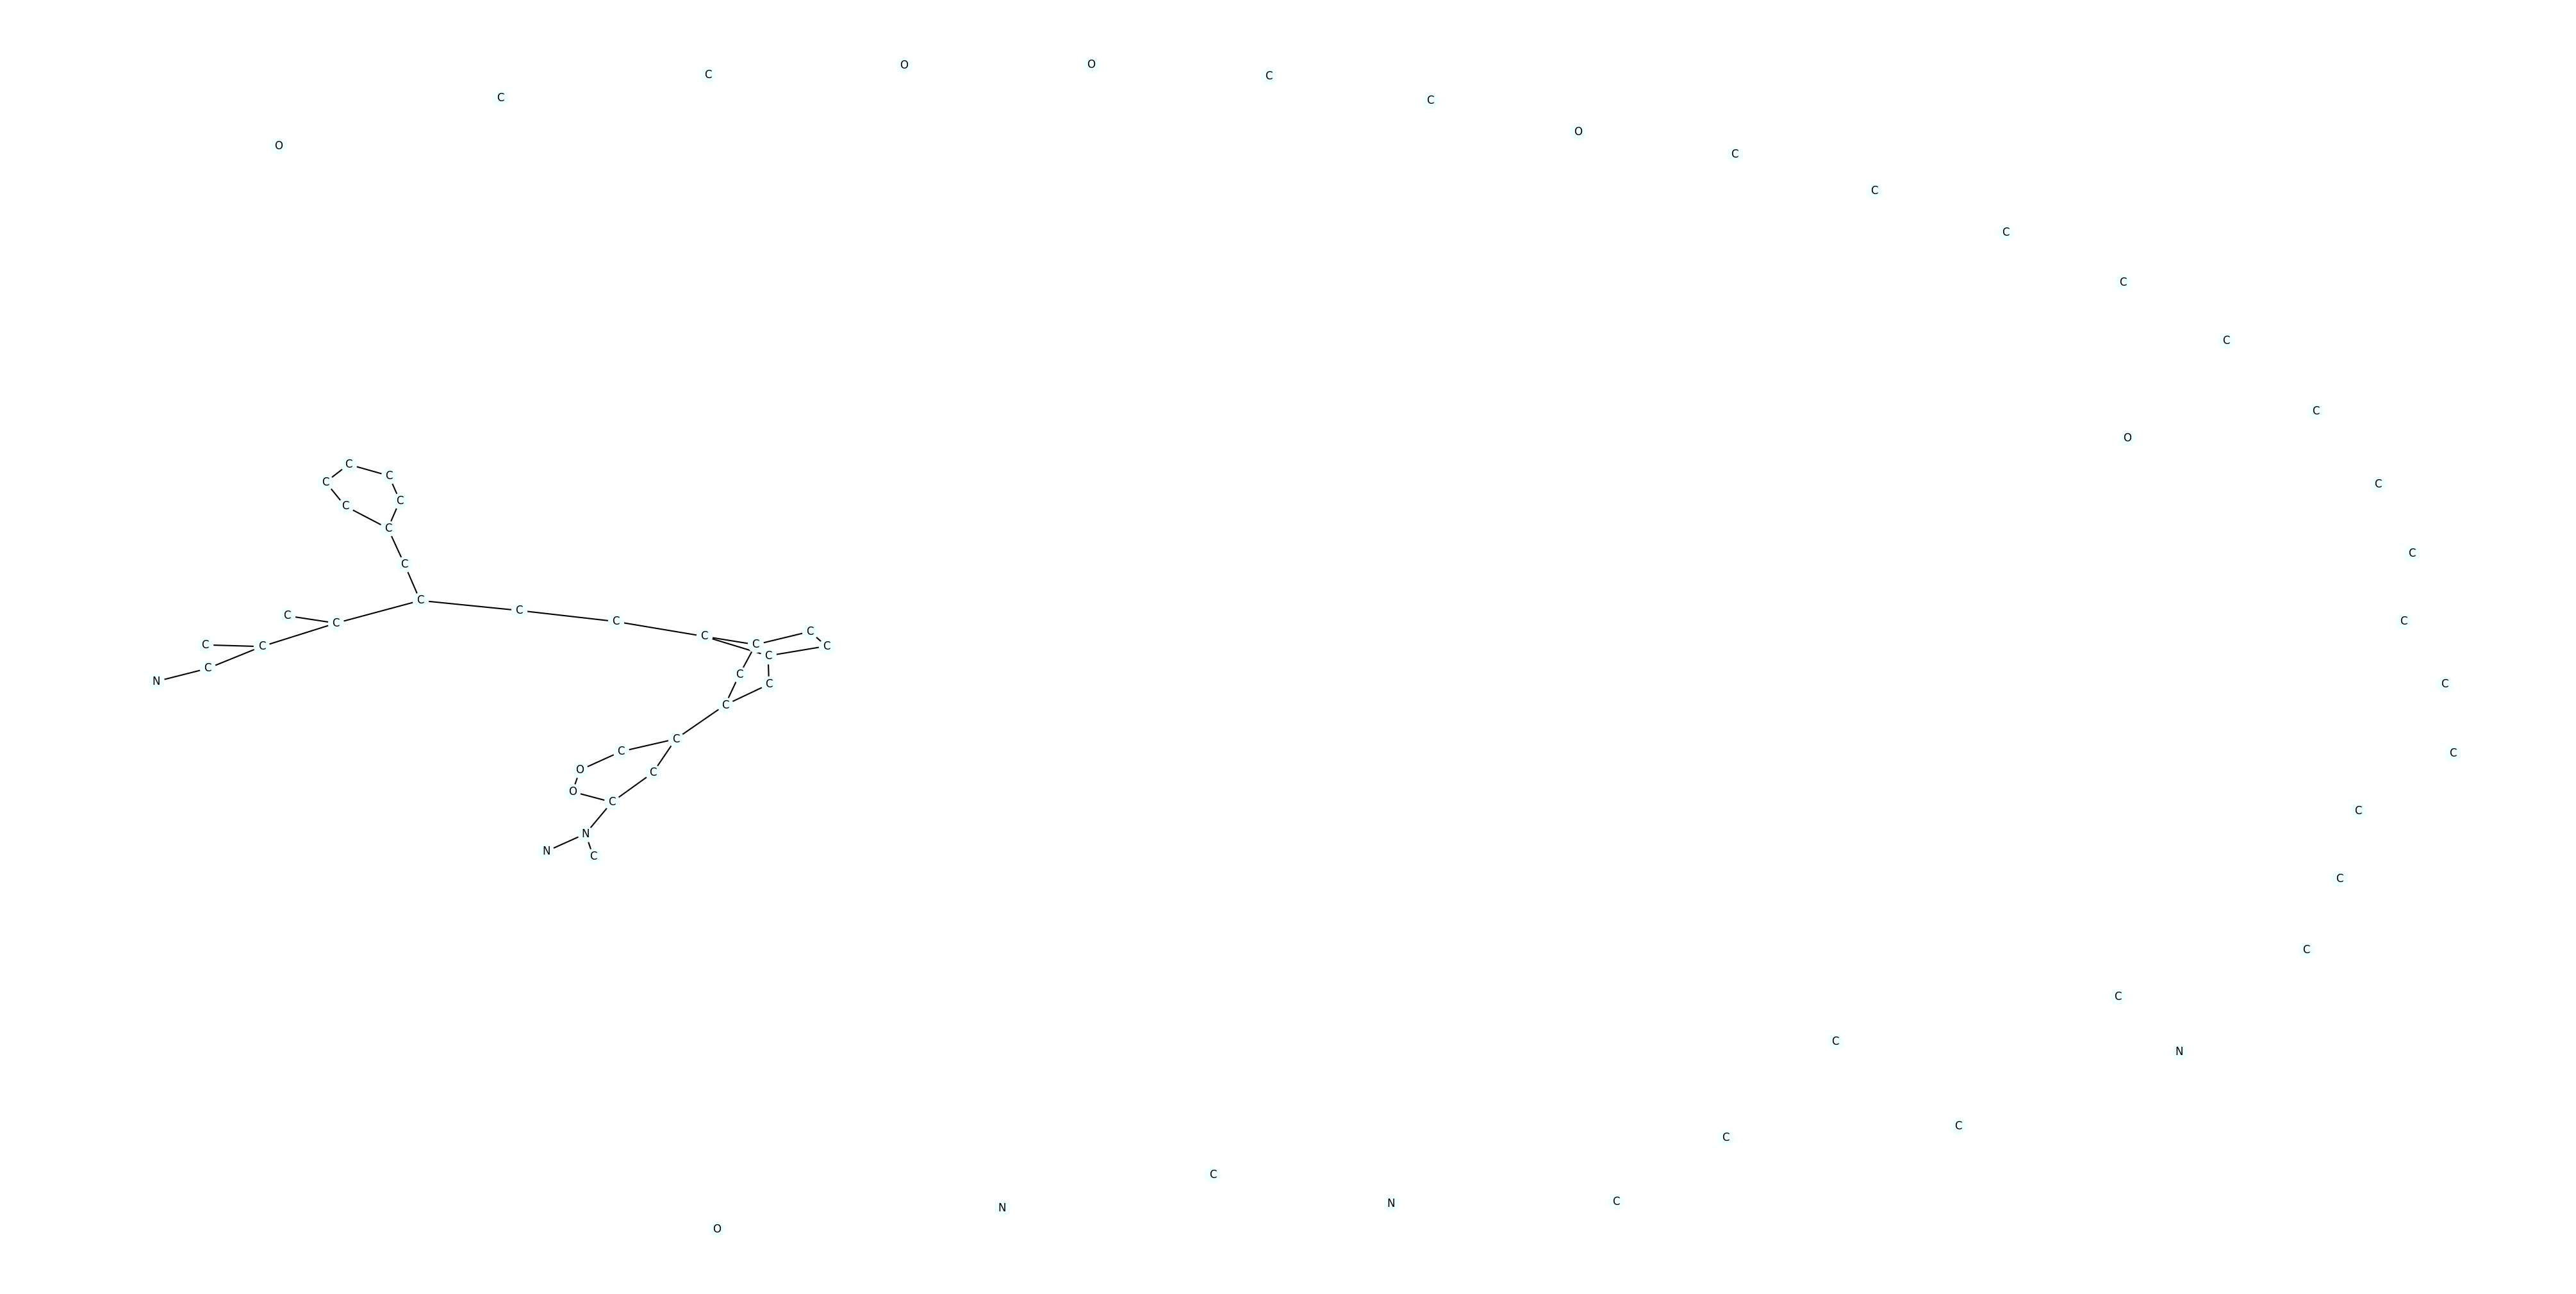

Molecule ID: Data(x=[66, 74], edge_index=[2, 72], edge_attr=[72, 5], y=[1], smiles='NC(=O)C1=CC=CC(=C1)[C@@H]1C[C@@H]2CC[C@H](C1)N2CCN(CC1CCCCC1)C(=O)[C@@H](O)CO')


In [96]:
import random

data = random.choice([t for t in train_dataset])
mol = to_molecule(data)
plt.figure(figsize=(40, 20))
draw_molecule(mol)
print(f"Molecule ID: {data}")

Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.
Atom "[C@H]" contains stereochemical information that will be discarded.
Atom "[C@@H]" contains stereochemical information that will be discarded.


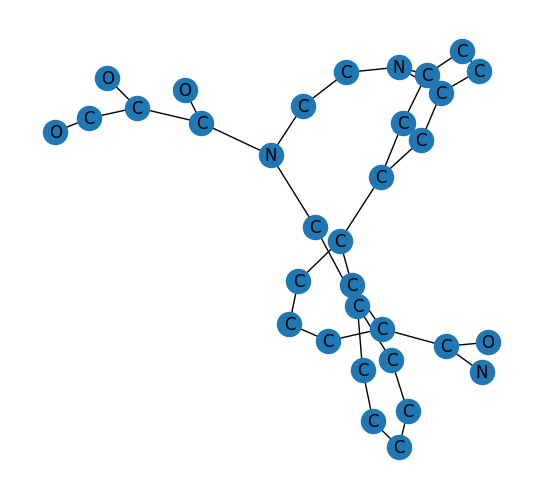

In [97]:

from pysmiles import read_smiles
import networkx as nx
smiles = 'NC(=O)C1=CC=CC(=C1)[C@@H]1C[C@@H]2CC[C@H](C1)N2CCN(CC1CCCCC1)C(=O)[C@@H](O)CO'

mol = read_smiles(smiles)

# atom vector (C only)
#print(mol.nodes(data='element'))

# adjacency matrix
#print(nx.to_numpy_matrix(mol, weight='order'))


import matplotlib.pyplot as plt
elements = nx.get_node_attributes(mol, name = "element")
nx.draw(mol, with_labels=True, labels = elements, pos=nx.spring_layout(mol))
plt.gca().set_aspect('equal')

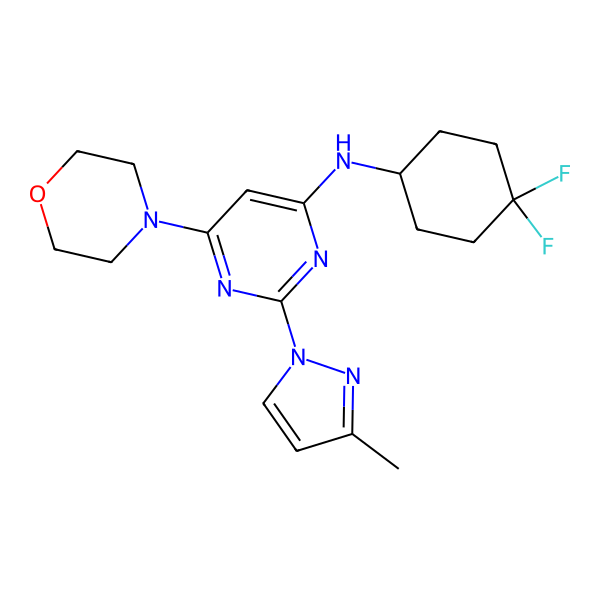

In [89]:
from rdkit import Chem
from rdkit.Chem import Draw

smiles = "CC1=NN(C=C1)C1=NC(NC2CCC(F)(F)CC2)=CC(=N1)N1CCOCC1"
mol = Chem.MolFromSmiles(smiles)

if mol is not None:
    grid = Draw.MolsToGridImage([mol], molsPerRow=1, subImgSize=(600,600))
grid


In [98]:
print(data.edge_index.t())
print(data.x)
print(data.edge_attr)
print(data.y)

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 2,  1],
        [ 3,  1],
        [ 3,  4],
        [ 3,  8],
        [ 4,  3],
        [ 4,  5],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7,  9],
        [ 8,  3],
        [ 8,  7],
        [ 9,  7],
        [ 9, 10],
        [ 9, 15],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 16],
        [12, 11],
        [12, 13],
        [13, 12],
        [13, 14],
        [14, 13],
        [14, 15],
        [14, 16],
        [15,  9],
        [15, 14],
        [16, 11],
        [16, 14],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 18],
        [19, 20],
        [19, 27],
        [20, 19],
        [20, 21],
        [21, 20],
        [21, 22],
        [21, 26],
        [22, 21],
        [22, 23],
        [23, 22],
        [23, 24],
        [2

In [85]:
from rdkit import Chem
import numpy as np

def get_atom_matrix(smiles, atom_map):
    mol = Chem.MolFromSmiles(smiles)
    atoms = mol.GetAtoms()
    num_atoms = len(atoms)
    num_atom_types = len(atom_map)
    atom_matrix = np.zeros((num_atoms, num_atom_types))

    for i, atom in enumerate(atoms):
        atom_symbol = atom.GetSymbol()
        if atom_symbol in atom_map:
            atom_index = atom_map.index(atom_symbol)
            atom_matrix[i, atom_index] = 1.0

    return atom_matrix

# Example usage
ATOM_MAP = ['C', 'O', 'Cl', 'H', 'N', 'F', 'Br', 'S', 'P', 'I', 'Na', 'K', 'Li', 'Ca']
smiles_formula = "CCO"  # Example SMILES formula
atom_matrix = get_atom_matrix(smiles_formula, ATOM_MAP)
print(atom_matrix)


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
from pysmiles import read_smiles
import networkx as nx
import matplotlib.pyplot as plt
import logging
logging.getLogger('pysmiles').setLevel(logging.CRITICAL)  # Anything higher than warning
wada_df['SMILES'] = wada_df['SMILES'].astype(str).replace('nan', '')
smiles_wada = wada_df['SMILES'].tolist()
#print(smiles_wada)

for idx, smiles in enumerate(smiles_wada):
    smiles_str = str(smiles)
    try:
        mol = read_smiles(smiles_str)
        elements = nx.get_node_attributes(mol, name="element")
        drug_name = wada_df.loc[idx, 'Name']
        
        print("SMILES #{}: {} - {}".format(idx, drug_name, smiles_str))
    except ValueError as e:
        print("Error processing SMILES #{}: {}".format(idx, e))
        continue

    nx.draw(mol, with_labels=True, labels=elements, pos=nx.spring_layout(mol))
    plt.gca().set_aspect('equal')
    plt.show()
